## **A. PROJECT TITLE AND DESCRIPTION:**

###**TITLE:**

PERDICTING HEART DISEASE IN PATIENTS.

### **ABOUT DATASET AND PROJECT:**

The dataset used for this task comes from various publicly available sources, including the Cleveland Heart Disease dataset, which includes several medical attributes associated with heart disease.<br/><br/>

Heart disease prediction has been a widely researched area in medical and computational sciences. Traditional diagnostic methods rely on clinical assessment and scoring systems, but machine learning (ML) has gained attention for its ability to analyze large datasets and improve predictive accuracy. This review explores existing studies on heart disease severity prediction, focusing on four key ML models: Random Forest, Gradient Boosting, Neural Networks, and Linear Regression.<br/><br/>

**SOURCE:** The dataset that was utilized for this study was sourced from kaggle [ww.kaggle.com]. The dataset can be located via this hyperlink:  https://www.kaggle.com/code/arnoldyanga/heart-disease-multi-class-classification/input. Below is an image of the head.

## **B. TITLE BLOCK**

1. **Project Title:**
    * GROUP 7 DATA SCIENCE FINAL PROJECT.

2. **GROUP:** 7

3. **Team members (8):**
    * Ejeh Louis Ochechi,
        * ejeh935@gmail.com (IDEAS/IGF/ABJ/55/UI/DS/0033)
    * Ajakaye Rodiat,
        * rodiatajakaye1@gmail.com (IDEAS/IGF/ABJ/55/UI/DS/0131)
    * Madueke Emmanuel,
        * deaconbukat@gmail.com (IDEAS/IGF/ABJ/55/UI/DS/0056)
    * MaryRose Richard-Obioha,
        * Marierosetto@yahoo.com (IDEAS/IGF/ABJ/55/UI/DS/0089)
    * Emmanuel Elaigwu,
        * emmanuelelaigwu33@gmail.com (IDEAS/IGF/ABJ/55/UI/DS/0061)

4. **Instructor:**
    * Sean Afam.

5. **Date of Submission:**
    * March, 2025

6. **Description:**
    * Data science project on: (a) Data Cleaning & Processing; (b) Exploratory Data Analysis (EDA); (c) Feature Engineering, (d) SDA and Data Visualization, (e) Modeling, (f) Evaluation, and (g) Deployment.

## **C. PRELIM**

#### **PROBLEM OVERVIEW AND ABOUT DATASET.**


##### **Context:**
Heart disease is the leading cause of death in the World. it is therefore pertinent that further work is done to helpd predict the risk of heart attack in patients

The dataset Heart_Disease_uci.csv will be utilised to predict which patients are most likely to suffer from heart disease using features in the dataset such as Id, Age, Sex, CP, #Trestbps, Chol, Fbs, Restecg, #Thalch <br><br>


##### **Source of Dataset:**
The datset can be located via this hyperlink: —
kaggle.com/code/arnoldyanga/heart.disease-multi-class classification/input.

#### **INSTALLING & LOADING OF LIBRARIES.**

In [64]:
!pip install gradio



In [65]:
import pandas as pd
import numpy as np, math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import gradio as gr
from sklearn.metrics import r2_score

#### **LOADING DATASET.**

In [66]:
from google.colab import drive
#drive.mount('/content/drive')

In [67]:
#path = "/content/drive/MyDrive/dataset2/heart_disease.csv"
path = "/content/gp7_v22_heart_disease_uci.csv"
#path = "/content/GP7_NB_Heart_Disease_Prediction.csv"

df = pd.read_csv(path)

In [68]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### **CREATING AN ATTRIBUTE DICTIONARY.**

In [69]:
# The Column Attribute (Frame-list) of the DataFrame.
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [70]:
# The Attributes Dictionary.

Patient = {
    """DICTIONARY OF ALL THE ATTRIBUTES IN
    THIS DATAFTAME"""
    "Id": 'unique identity',
    "Age": 'Patient`s age in years',
    "Sex": 'Gender (Male or Female)',
    "Dataset": 'Location of data collection',
    "Chol": 'Cholesterol measure (mg/dl)',
    "CP": 'Chest pain type',
    "trestbps": 'Resting blood pressure',
    "Fbs": 'Fasting blood sugar',
    "restecg": 'ecg observation at resting condition',
    "Thalch": 'Maximum heart rate achieved',
    "exang": 'Exercise-induced angina',
    "oldpeak": 'ST depression induced by exercise relative to rest',
    "slope" : 'Slope of the peak exercise ST segment',
    "ca" : 'Number of major vessels colored by fluoroscopy',
    "thal" : 'Thalassemia (blood disorder) diagnosis',
    "num" : 'Number of vessels diseased',
}

print(Patient)

{'DICTIONARY OF ALL THE ATTRIBUTES IN\n    THIS DATAFTAMEId': 'unique identity', 'Age': 'Patient`s age in years', 'Sex': 'Gender (Male or Female)', 'Dataset': 'Location of data collection', 'Chol': 'Cholesterol measure (mg/dl)', 'CP': 'Chest pain type', 'trestbps': 'Resting blood pressure', 'Fbs': 'Fasting blood sugar', 'restecg': 'ecg observation at resting condition', 'Thalch': 'Maximum heart rate achieved', 'exang': 'Exercise-induced angina', 'oldpeak': 'ST depression induced by exercise relative to rest', 'slope': 'Slope of the peak exercise ST segment', 'ca': 'Number of major vessels colored by fluoroscopy', 'thal': 'Thalassemia (blood disorder) diagnosis', 'num': 'Number of vessels diseased'}


#### **CREATING AN ATTRIBUTE FRAMELIST.**

In [71]:
## Diff Framelists:
# Original Attribs Before Data Processing:
ALL_COLS = df.columns
ALL_COLS = ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Zero-effect Attributes :
YEYE = ['id', 'dataset']

# Attribs After Droppage:
DF_DROP = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Features Before Encoding, X:
X = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',   'exang', 'oldpeak', 'slope', 'ca', 'thal']

# All No MV Droppage Attributes with Framelist :
NOMISS_COL = ['age', 'sex', 'cp', 'num']

# All MV Droppage Attributes Framelist :
MISS_COL = ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# MV Numvalued Features Framelist :
MISS_NUMVAL = ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']

# MV Lettered Categorical Features.
MISSING_LCAT = ["thal", "slope" ]

# Framelist for Numerical Attributes.
NUMCAL_COLS = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Framelist for Categorical Attributes.
CATCAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num']

# Framelist for Lettered Categorical Attributes.
LCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal']

# Framelist for Non-lettered Categorical Attributes.
NCATCAL_COLS = ['fbs', 'exang', 'ca']

# Framelist for Truth-labeled Attributes.
TCATCAL_COLS = ['fbs', 'exang']

# Framelist of Encodable Categorical Features.
ENCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

# Framelist of Non-encodable cat Attribs.
NENCATCAL_COLS = ['fbs', 'exang', 'num']

# Framelist for Any Number Valued Column (NUMCAL_COLS + NCATCAL_COLS).
NUMVAL = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']

# Framelist for Target.
TARGET = ['num']

# Framelist for Features.
features_df = df.drop(columns=['num'])
FEATURES = features_df.columns


# ——————
## Alternate Framelists.
# Cat Features Alternate definition;
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca' ]    # added 'ca'
CATEGORICAL_FTS = categorical_cols
#
# MV Num Features Alternate definition;
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']   # removed 'ca'
MV_NUMERICAL_FTS = numerical_cols
#

FEATURES

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## **D. EDA**

In [72]:
# View Summary Info of Dataframe.
df.info()

# Statistical Description of Numerical Attributes.
df.describe()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [73]:
df.shape, type(df)

((920, 16), pandas.core.frame.DataFrame)

In [74]:
ALL_COLS = df.columns
ALL_COLS

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [75]:
df.head(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [76]:
df.tail(15)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
905,906,61,Male,VA Long Beach,non-anginal,NaN,284.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
906,907,61,Male,VA Long Beach,non-anginal,120.0,337.0,False,normal,98.0,True,0.0,NaN,NaN,NaN,3
907,908,58,Male,VA Long Beach,non-anginal,150.0,219.0,False,st-t abnormality,118.0,True,0.0,NaN,NaN,NaN,2
908,909,74,Male,VA Long Beach,asymptomatic,155.0,310.0,False,normal,112.0,True,1.5,downsloping,NaN,NaN,2
909,910,68,Male,VA Long Beach,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,911,51,Female,VA Long Beach,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
911,912,62,Male,VA Long Beach,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,NaN,NaN,4
912,913,53,Male,VA Long Beach,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,NaN,NaN,3
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2


In [77]:
# Inspect Categorical Columns.
# name, n(uniques+na), n(isnull), valcounts+na, dtype.
#
columns3 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']
columns3 = CATCAL_COLS
#
for i in columns3:
    print("\n**********")
    print(f"{i};  {df[i].nunique(dropna=False)} unique labels (null-incl)")
    print("****")
    print(f"{df[i].isnull().sum()} null values")
    print("****")
    #print("valuecounts (nullic)")
    print(df[i].value_counts(dropna=False))


**********
sex;  2 unique labels (null-incl)
****
0 null values
****
sex
Male      726
Female    194
Name: count, dtype: int64

**********
cp;  4 unique labels (null-incl)
****
0 null values
****
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

**********
fbs;  3 unique labels (null-incl)
****
90 null values
****
fbs
False    692
True     138
NaN       90
Name: count, dtype: int64

**********
restecg;  4 unique labels (null-incl)
****
2 null values
****
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
NaN                   2
Name: count, dtype: int64

**********
exang;  3 unique labels (null-incl)
****
55 null values
****
exang
False    528
True     337
NaN       55
Name: count, dtype: int64

**********
slope;  4 unique labels (null-incl)
****
309 null values
****
slope
flat           345
NaN            309
upsloping      203
downsloping     63
Name: count, dtype: int64

**********


## **E.    DATA CLEANING & PROCESSING (DCP).**

#### **E-1.  ATTRIBUTE VISUALIZATION**

###### a. NUMERICAL ATTRIBUTE VISUALISATION.

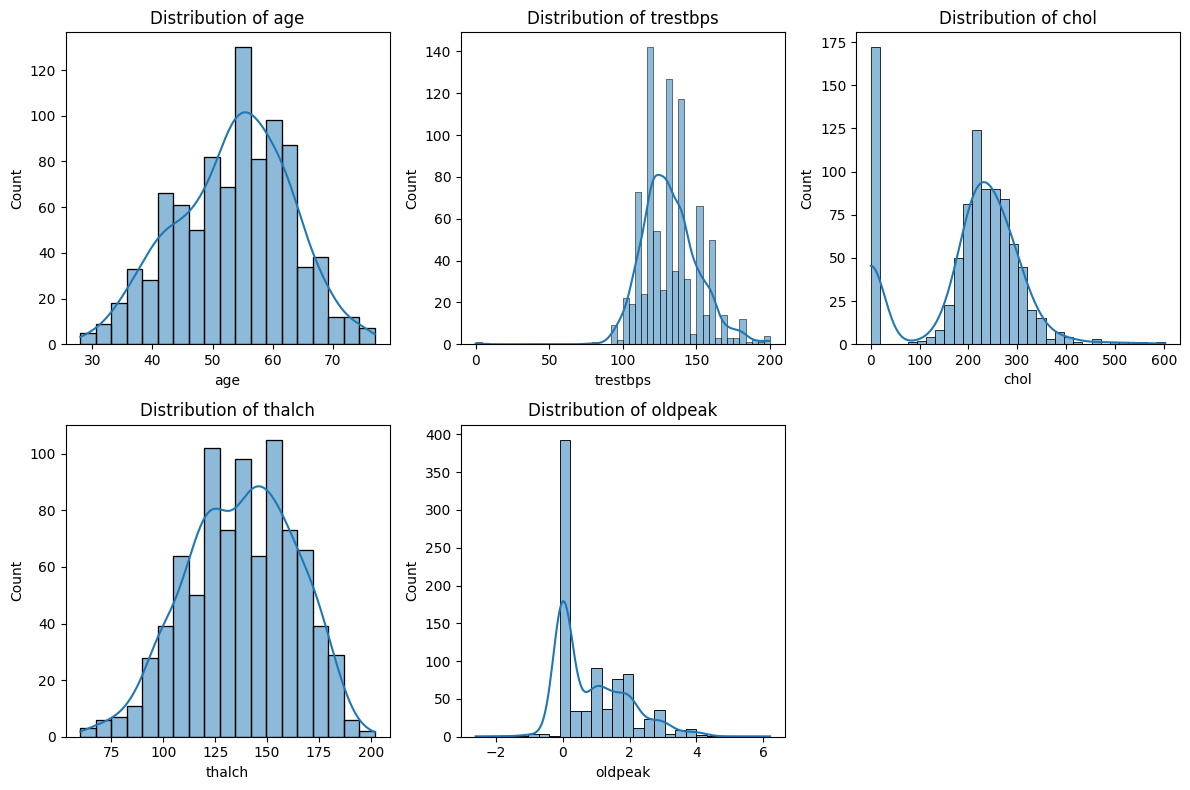

In [78]:
# hist + kde for catcal columns.
import math
# Sns hist wt Kde=True pmtr for whole dframe.
#
# CATCAL_COLS = ['col1',...., 'col7']
n = len(NUMCAL_COLS)
plt.figure(figsize=(12, 8))
for i, column in enumerate(NUMCAL_COLS, 1):
    plt.subplot(2, math.ceil(n/2), i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

##### b. CATEGORICAL ATTRIBUTE VISUALISATION.

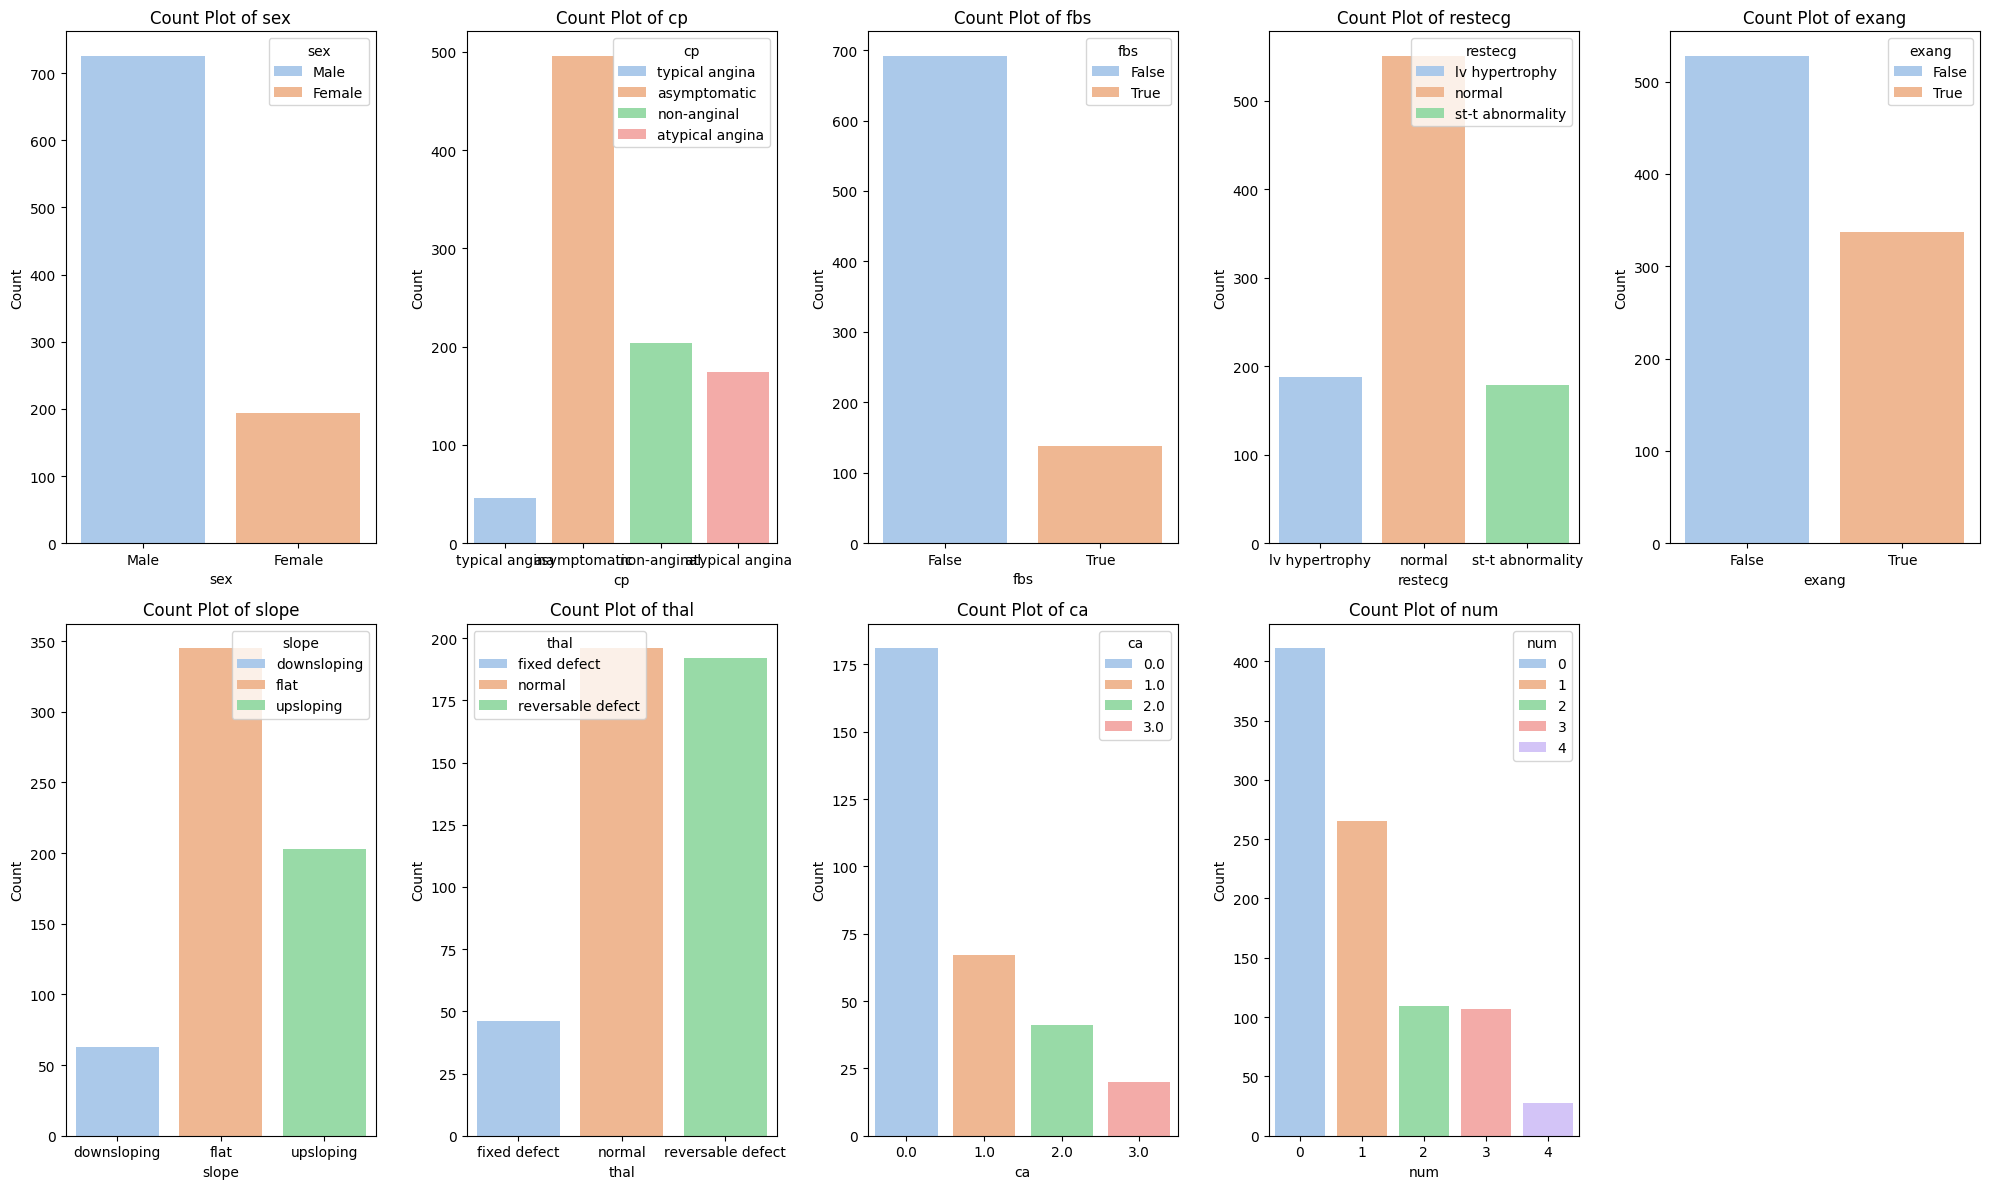

In [79]:
# Crammer Correlation.
# List of categorical columns.

cat_cols = CATCAL_COLS
df1 = df

# Define number of rows and columns
rows = 2  # Fixed to 2 rows
cols = math.ceil(len(cat_cols) / rows)  # Calculate needed columns

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 6 * rows))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Loop through each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=df1[col], hue=df1[col], ax=axes[i], palette='pastel', legend=True)
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout
plt.show()

#### **E-2. HANDLING INFINITY.**

Infinity values need handling because they are very likely overshadow statistical inferences of other coordinate values in same field or record as the case may be.

In [80]:
# Detecting Infinity Counts.
np.isinf(df[NUMCAL_COLS]).sum()

,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0


INFERENCE: No infinite value was detected in dataframe.

#### **E-3. DUPLICITY DETECTION HANDLING.**

Duplicity is the presense of duplicate records in a dataframe.

In [81]:
# Detecting Duplicity.

df.duplicated().sum()

0

In [82]:
# View Exact Duplicate Records.

duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [83]:
# Remove Duplicates.
df = df.drop_duplicates()

In [84]:
# DataFrame Summary Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [85]:
# Confirming Duplicity Removal.

df.duplicated().sum()

0

**INFERENCE: All Duplicity was detected in dataframe and successfully removed.**


#### **E-4. ZERO-EFFECT FEATURE DROPPAGE.**

In [86]:
# Droppage of Zero-effect columns.
df_drop = df.drop(columns=['id', 'dataset'])

In [87]:
df.shape, df_drop.shape

((920, 16), (920, 14))

In [88]:
# Display the first few rows and basic info of the dataset

df_drop.info()
df_drop.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


#### **E-5. HANDLE MISSING VALUES:**<br/>

###### Here we will be checking missing values, and we will be removing them if any is detected.

######     **E-3-I. CHECKING FOR MISSING VALUES.**

In [89]:
df_drop.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [90]:


df_drop.replace('?', np.nan, inplace=True)
#df.dropna(inplace=True)
#df = df.apply(pd.to_numeric, errors='ignore')
#df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

In [91]:
#df_cleaned = df_drop
df_drop.shape

(920, 14)

######     **E-3-II. VISUALIZATION OF MISSING VALUES.**

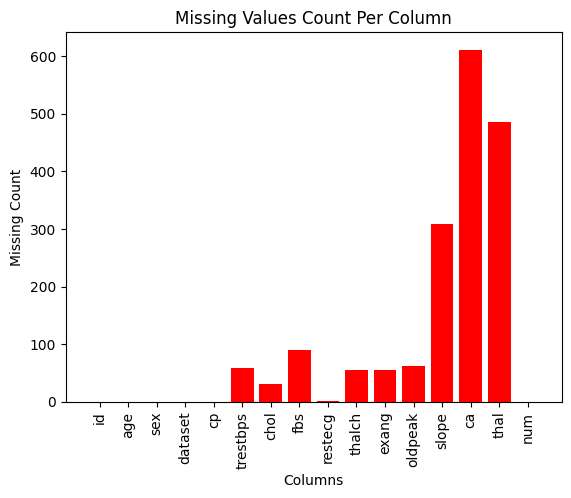

In [92]:
# Visualisation of Missingness of Columns Using Barplot.

missing_counts = df.isnull().sum()
plt.bar(df.columns, missing_counts, color='red')
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.title("Missing Values Count Per Column")
plt.xticks(rotation=90)  # Corrected line
plt.show()

<Axes: >

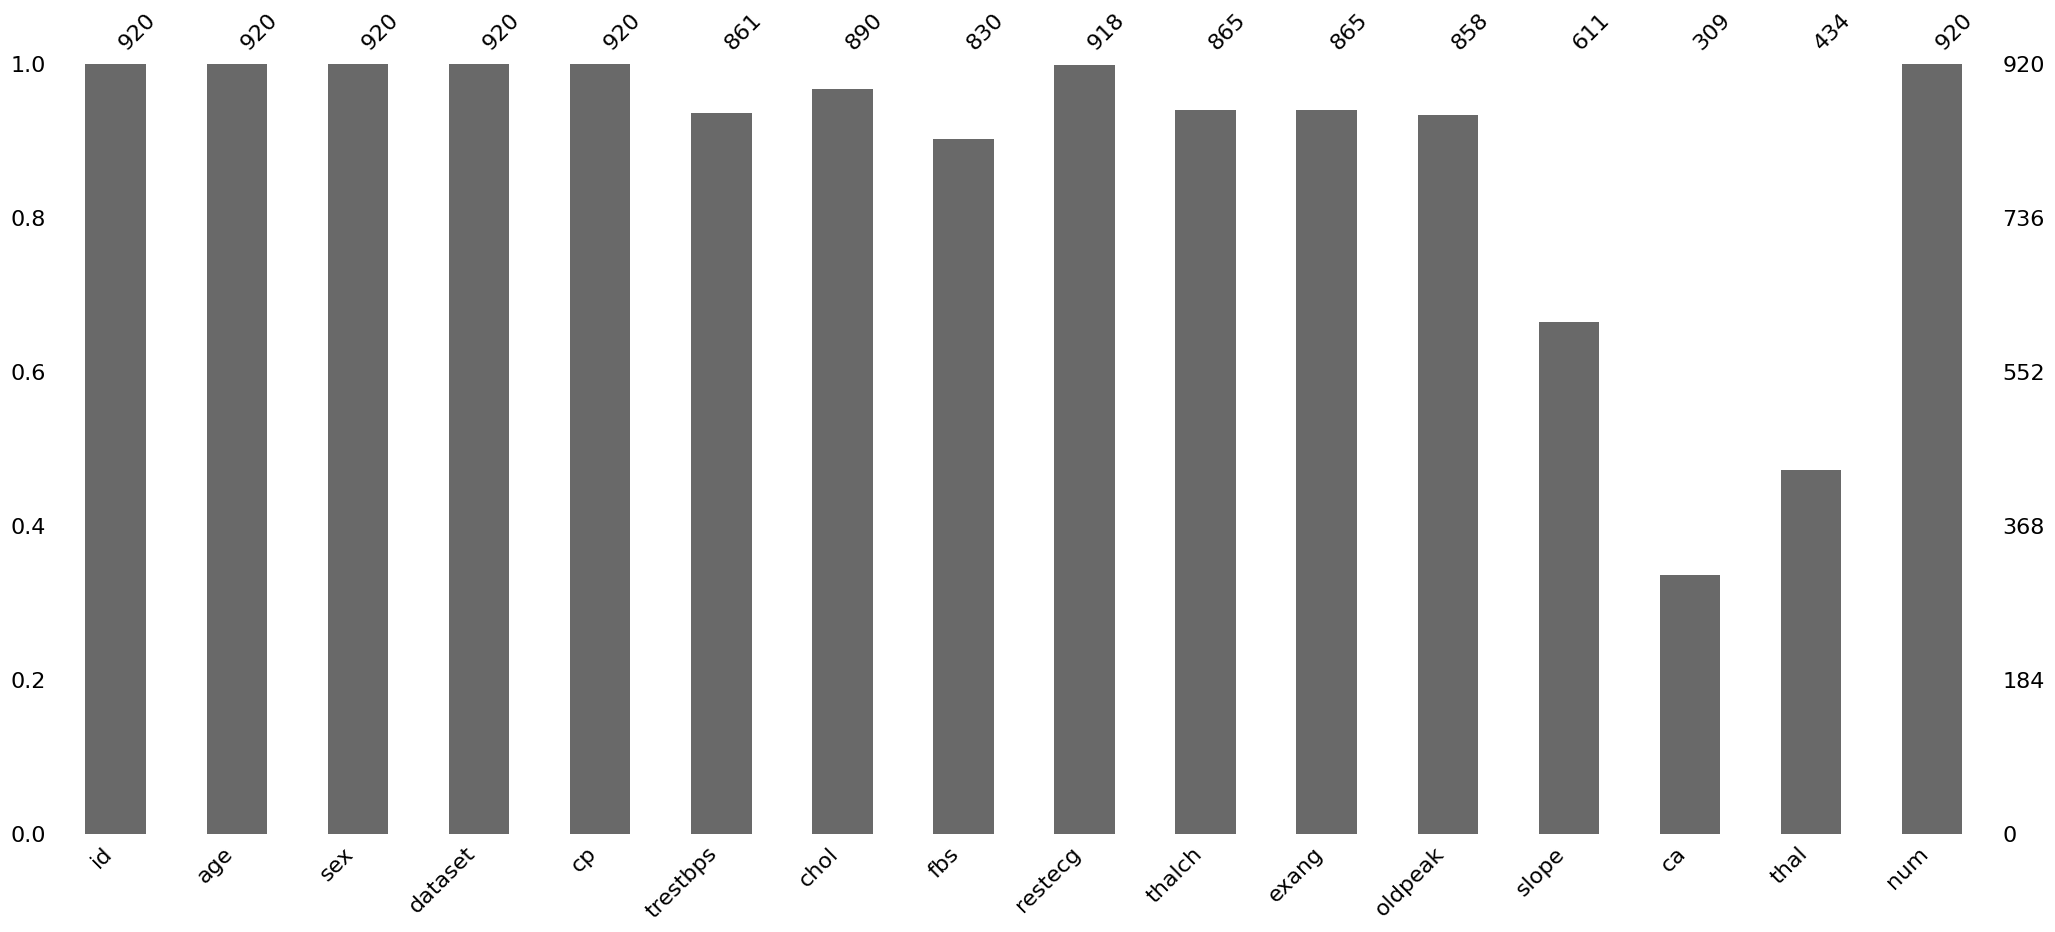

In [93]:
# Visualize the Relative Bar-Missingness of the Columns Using Msnoplot.
import missingno as msno
msno.bar(df)

##### **E-3-III. REMOVAL OF MISSING VALUES**

In [94]:
df_cleaned = df_drop.copy(deep=True)

In [95]:
# Handle missing values in Num Cols.
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df_cleaned[numerical_cols] = df_cleaned[numerical_cols].fillna(df_drop[numerical_cols].median())

In [96]:
%%script no
# Handle missing values in Cat Colscategorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
#df_drop[categorical_cols] = df_drop[categorical_cols].fillna(df_drop[categorical_cols].mode().iloc[0])
for i in categorical_cols: df_cleaned[i].fillna(df_cleaned[i].mode()[0], inplace=True)

Couldn't find program: 'no'


In [97]:
%%script no
<ipython-input-55-5a4f4cb37931>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for i in categorical_cols: df_drop[i].fillna(df_drop[i].mode()[0], inplace=True)
<ipython-input-55-5a4f4cb37931>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for i in categorical_cols: df_drop[i].fillna(df_drop[i].mode()[0], inplace=True)

Couldn't find program: 'no'


In [98]:
# Handle missing values in Cat Colscategorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
#df_drop[categorical_cols] = df_drop[categorical_cols].fillna(df_drop[categorical_cols].mode().iloc[0])
#for i in categorical_cols: df_drop[i].fillna(df_drop[i].mode()[0], inplace=True)
for i in categorical_cols:
    df_cleaned[i] = df_cleaned[i].fillna(df_cleaned[i].mode()[0]).infer_objects(copy=False)

<ipython-input-98-c9e8131878ba>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[i] = df_cleaned[i].fillna(df_cleaned[i].mode()[0]).infer_objects(copy=False)


In [99]:
# Verify the dataset
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [100]:
df.shape, df_cleaned.shape

((920, 16), (920, 14))

In [101]:

display(df_cleaned.head(10))
df_cleaned.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
910,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,0.0,normal,0
911,62,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,True,3.0,flat,0.0,normal,4
912,53,Male,asymptomatic,144.0,300.0,True,st-t abnormality,128.0,True,1.5,flat,0.0,normal,3
913,62,Male,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,flat,0.0,normal,1
914,46,Male,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,flat,0.0,normal,2
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0
919,62,Male,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,flat,0.0,normal,1


In [102]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [103]:
df_cleaned.shape

(920, 14)

In [104]:
# df_cleaned.sum() == df_drop.sum()
for i in df_cleaned:
    for j in df_drop:
        if i == j:
            print((df_cleaned[i] == df_drop[j]).sum())

920
920
920
861
890
830
918
865
865
858
611
309
434
920


In [105]:
#
# Inspect Categorical Columns.
# name, n(uniques+na), n(isnull), valcounts+na, dtype.
#
#columns3 = ['ca', 'thal', 'slope', 'oldpeak', 'exang', 'thalch', 'fbs', 'chol', 'trestbps']

# Framelist for Categorical Attributes.
CATCAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num']

columns3 = CATCAL_COLS
#
for i in columns3:
    print("\n\n**********")
    print(f"{i};  {df_cleaned[i].nunique(dropna=False)} unique labels (nullic)")
    print("****")
    print(f"{df_cleaned[i].isnull().sum()} null values")
    print("****")
    #print("valuecounts (nullic)")
    print(df_cleaned[i].value_counts(dropna=False))



**********
sex;  2 unique labels (nullic)
****
0 null values
****
sex
Male      726
Female    194
Name: count, dtype: int64


**********
cp;  4 unique labels (nullic)
****
0 null values
****
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


**********
fbs;  2 unique labels (nullic)
****
0 null values
****
fbs
False    782
True     138
Name: count, dtype: int64


**********
restecg;  3 unique labels (nullic)
****
0 null values
****
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


**********
exang;  2 unique labels (nullic)
****
0 null values
****
exang
False    583
True     337
Name: count, dtype: int64


**********
slope;  3 unique labels (nullic)
****
0 null values
****
slope
flat           654
upsloping      203
downsloping     63
Name: count, dtype: int64


**********
thal;  3 unique labels (nullic)
****
0 null values
****
thal
normal               68

In [106]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


## **F. SDA & VISUALISATION.**

#### **CHI CORRELATION FOR CATEGORICAL FEATURES.**

In [107]:
df[CATCAL_COLS].columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'num'], dtype='object')

In [108]:
import pandas as pd
import scipy.stats as ss
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

"""
# Example categorical dataset
df = pd.DataFrame({
    'col1': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
    'col2': ['X', 'Y', 'X', 'X', 'Y', 'X', 'X', 'Y'],
    'col3': ['M', 'N', 'M', 'M', 'N', 'M', 'M', 'N']
})

# Define categorical columns
CATCAL_COLS = ['col1', 'col2', 'col3']
"""

# Initialize dictionary to store p-values
chi2_results = {}

# Compute chi-square test for each pair of categorical variables
for i, j in itertools.combinations(CATCAL_COLS, 2):
    contingency_table = pd.crosstab(df[i], df[j])
    chi2, p, dof, expected = ss.chi2_contingency(contingency_table)
    chi2_results[(i, j)] = p  # Store p-value

# Convert dictionary to matrix
chi2_matrix = pd.DataFrame(index=CATCAL_COLS, columns=CATCAL_COLS, dtype=float)

# Fill the matrix with p-values
for (i, j), p_value in chi2_results.items():
    chi2_matrix.loc[i, j] = p_value
    chi2_matrix.loc[j, i] = p_value  # Fill symmetrically

# Fill diagonal with 1s (self-correlation)
np.fill_diagonal(chi2_matrix.values, 1)

# Convert to float for heatmap
chi2_matrix = chi2_matrix.astype(float)
chi2_matrix

,sex,cp,fbs,restecg,exang,slope,thal,ca,num
sex,1.000000e+00,3.036090e-08,0.014005,0.082266,1.505968e-07,8.302808e-03,2.098234e-14,1.419203e-01,3.996551e-18
cp,3.036090e-08,1.000000e+00,0.089515,0.002759,1.315923e-37,1.404639e-08,1.738203e-11,6.518651e-04,3.404866e-51
fbs,1.400519e-02,8.951507e-02,1.000000,0.000003,4.779907e-01,3.730550e-02,1.128485e-02,4.965967e-02,5.852437e-05
restecg,8.226590e-02,2.758915e-03,0.000003,1.000000,2.764031e-02,5.483552e-02,8.175745e-05,1.349388e-01,4.396712e-06
exang,1.505968e-07,1.315923e-37,0.477991,0.027640,1.000000e+00,9.482015e-17,8.830124e-12,7.589712e-03,6.524454e-40
slope,8.302808e-03,1.404639e-08,0.037305,0.054836,9.482015e-17,1.000000e+00,1.190423e-08,1.380535e-01,6.100617e-19
thal,2.098234e-14,1.738203e-11,0.011285,0.000082,8.830124e-12,1.190423e-08,1.000000e+00,1.786251e-03,5.508313e-21
ca,1.419203e-01,6.518651e-04,0.049660,0.134939,7.589712e-03,1.380535e-01,1.786251e-03,1.000000e+00,2.136634e-18
num,3.996551e-18,3.404866e-51,0.000059,0.000004,6.524454e-40,6.100617e-19,5.508313e-21,2.136634e-18,1.000000e+00


In [109]:
#
# Use Chi2 Boolean Correlation Matrix to Verify Association.

# Create a boolean matrix where p-values ≤ 0.05 are True, else False
significance_matrix = chi2_matrix <= 0.05

# Display the matrix
print(significance_matrix)

           sex     cp    fbs  restecg  exang  slope   thal     ca    num
sex      False   True   True    False   True   True   True  False   True
cp        True  False  False     True   True   True   True   True   True
fbs       True  False  False     True  False   True   True   True   True
restecg  False   True   True    False   True  False   True  False   True
exang     True   True  False     True  False   True   True   True   True
slope     True   True   True    False   True  False   True  False   True
thal      True   True   True     True   True   True  False   True   True
ca       False   True   True    False   True  False   True  False   True
num       True   True   True     True   True   True   True   True  False


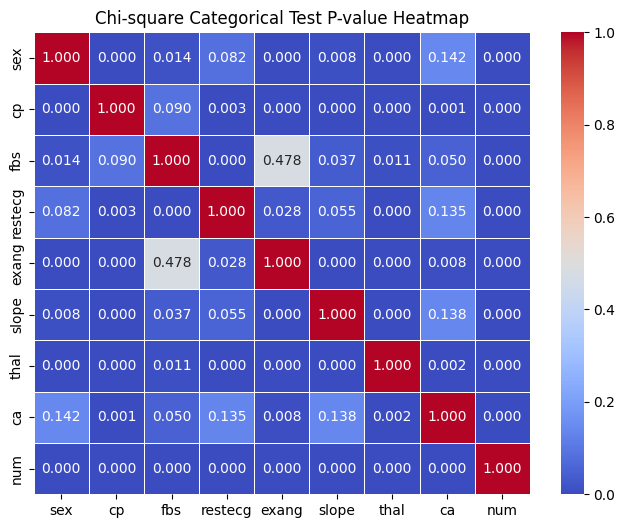

In [110]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(chi2_matrix, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Chi-square Categorical Test P-value Heatmap")
plt.show()
#

In [111]:
"""
What This Chi2 Correlation Imply:

** Computes the Chi-Square test for all pairs of categorical columns.
** Outputs p-values, which indicate if the relationship is significant.
** It does not determine the strength of a significant association.
** It only determines if there is sort of a relationship between bipartite variables.
** An association of p<=0.05 could be low or high.
** Other methods should be used to dstermine strength of multicolinearity.
** Lower p-values (<= 0.05) suggest a significant rel'ship while higher p-values (> 0.05) indicate insignificant rel'ship.
** After getting p-value, we will use the Crammer rule to Confirm Strong Multicolinearity in chi2 value of p <= 0.05.
"""
pass

#### **CRAMMER CORRELATION FOR CATEGORICAL FEATURES.**

In [112]:

# Use Crammer Correlation Matrix to Test Further on Multicolinearity.

import pandas as pd
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    """Compute Cramér's V between two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

def cramers_v_matrix(df, cat_feats):
    """Compute the Cramér's V correlation matrix for categorical features."""
    n = len(cat_feats)
    cramers_matrix = pd.DataFrame(np.ones((n, n)), index=cat_feats, columns=cat_feats)

    for i in range(n):
        for j in range(i+1, n):  # Compute only upper triangle (symmetry)
            v = cramers_v(df[cat_feats[i]], df[cat_feats[j]])
            cramers_matrix.iloc[i, j] = v
            cramers_matrix.iloc[j, i] = v  # Fill symmetric value

    return cramers_matrix

# Example DataFrame
"""
df = pd.DataFrame({
    'col1': ['A', 'B', 'A', 'B', 'C'],
    'col2': ['X', 'X', 'Y', 'Y', 'Z'],
    'col3': ['M', 'N', 'M', 'M', 'N']
})
"""

# Categorical features
#cat_feats = ['col1', 'col2', 'col3']

# Compute Cramér's V correlation matrix
cramer_matrix = cramers_v_matrix(df[CATCAL_COLS], CATCAL_COLS)
print(cramer_matrix)

              sex        cp       fbs   restecg     exang     slope      thal  \
sex      1.000000  0.202842  0.085288  0.073769  0.178568  0.125232  0.380971   
cp       0.202842  1.000000  0.088520  0.104395  0.449231  0.197414  0.267330   
fbs      0.085288  0.088520  1.000000  0.174369  0.025487  0.110159  0.148627   
restecg  0.073769  0.104395  0.174369  1.000000  0.091194  0.087139  0.166107   
exang    0.178568  0.449231  0.025487  0.091194  1.000000  0.347801  0.343274   
slope    0.125232  0.197414  0.110159  0.087139  0.347801  1.000000  0.235506   
thal     0.380971  0.267330  0.148627  0.166107  0.343274  0.235506  1.000000   
ca       0.132754  0.176826  0.160488  0.125697  0.196577  0.125869  0.187683   
num      0.308801  0.313951  0.172414  0.146232  0.468153  0.291911  0.362533   

               ca       num  
sex      0.132754  0.308801  
cp       0.176826  0.313951  
fbs      0.160488  0.172414  
restecg  0.125697  0.146232  
exang    0.196577  0.468153  
slope    

In [113]:
#
# Use Crammer Boolean Correlation Matrix to Verify Multicolinearity.

# Create a boolean matrix where p-values ≤ 0.05 are True, else False
significance_matrix3 = cramer_matrix >= 0.5

# Display the matrix
print(significance_matrix3)

           sex     cp    fbs  restecg  exang  slope   thal     ca    num
sex       True  False  False    False  False  False  False  False  False
cp       False   True  False    False  False  False  False  False  False
fbs      False  False   True    False  False  False  False  False  False
restecg  False  False  False     True  False  False  False  False  False
exang    False  False  False    False   True  False  False  False  False
slope    False  False  False    False  False   True  False  False  False
thal     False  False  False    False  False  False   True  False  False
ca       False  False  False    False  False  False  False   True  False
num      False  False  False    False  False  False  False  False   True


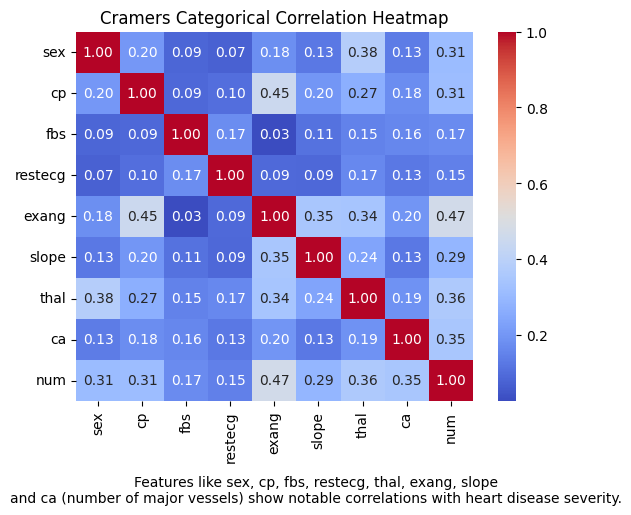

In [114]:

# Heatmap of Crammer Correlation Matrixm

sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cramers Categorical Correlation Heatmap')
plt.figtext(0.5, -0.1,
            'Features like sex, cp, fbs, restecg, thal, exang, slope\n'
            'and ca (number of major vessels) show notable correlations with heart disease severity.',
            ha='center', fontsize=10)
plt.show()

In [115]:
"""
What This Crammers Correlator Imply:

** The p-value indicates the correlation strength of the corresponding vars.
** It shows the strength of Multicolinearity between two bipartito Variables.
** 0.00 <= V <= 0.10   |  Insignificant/Very Weak.
** 0.10   < V <= 0.30   |  Weak.
** 0.30   < V <= 0.50   |  Moderate.
** 0.50   < V <= 0.80   |  Strong.
** 0.80   < V <= 1.00   |  Very Strong.
** None of the bipartite attributes exhibited Strong Multicolinearity.
"""
pass

#### **PEARSONS CORRELATION FOR NUMERICAL FEATURES.**

In [116]:
#
# Pearsons Correlation matrix.

corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()
corr_matrix

,age,trestbps,chol,thalch,oldpeak,ca,num
age,1.000000,0.230784,-0.086010,-0.349715,0.233550,0.219413,0.339596
trestbps,0.230784,1.000000,0.089484,-0.104747,0.161217,0.039092,0.113178
chol,-0.086010,0.089484,1.000000,0.226047,0.047454,0.152514,-0.230539
thalch,-0.349715,-0.104747,0.226047,1.000000,-0.149401,0.038207,-0.349173
oldpeak,0.233550,0.161217,0.047454,-0.149401,1.000000,0.218412,0.411588
ca,0.219413,0.039092,0.152514,0.038207,0.218412,1.000000,0.261797
num,0.339596,0.113178,-0.230539,-0.349173,0.411588,0.261797,1.000000


In [117]:
#
# Use Pearsons Boolean Correlation Matrix to Verify Multicolinearity.

# Create a boolean matrix where p-values ≤ 0.05 are True, else False
significance_matrix4 = corr_matrix >= 0.6

# Display the matrix
print(significance_matrix4)

            age  trestbps   chol  thalch  oldpeak     ca    num
age        True     False  False   False    False  False  False
trestbps  False      True  False   False    False  False  False
chol      False     False   True   False    False  False  False
thalch    False     False  False    True    False  False  False
oldpeak   False     False  False   False     True  False  False
ca        False     False  False   False    False   True  False
num       False     False  False   False    False  False   True


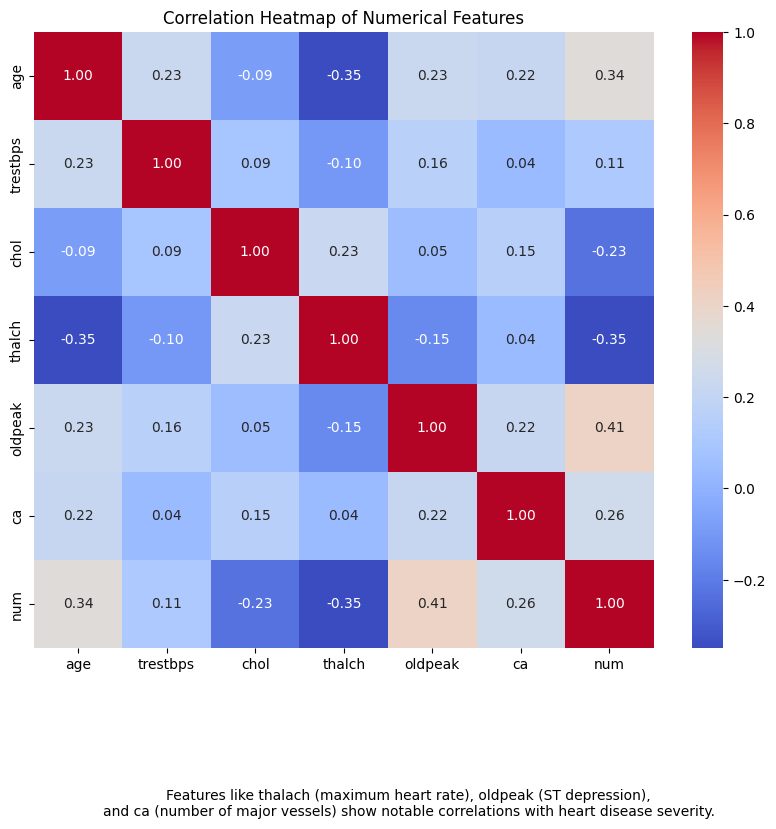

In [118]:
#
# Pearsons Correlation Heatmap.

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.figtext(0.5, -0.1,
            'Features like thalach (maximum heart rate), oldpeak (ST depression),\n'
            'and ca (number of major vessels) show notable correlations with heart disease severity.',
            ha='center', fontsize=10)
plt.show()

#### **CHECK FOR OUTLIERS AND DISTRIBUTION OF DATA**

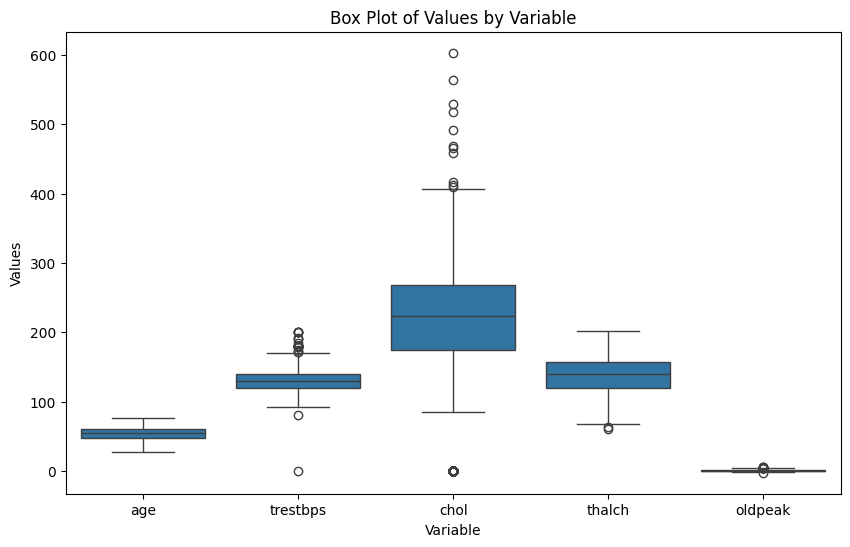

In [119]:
# Use boxplots to detect outliers and check distribution.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt target dataframe into x & y axial values.
df_melted = pd.melt(df, value_vars=NUMCAL_COLS, var_name='Variable', value_name='Values')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Values', data=df_melted)
plt.title("Box Plot of Values by Variable")
plt.show()

#### **PAIRPLOT OF NUMBER VALUED COLUMNS.**

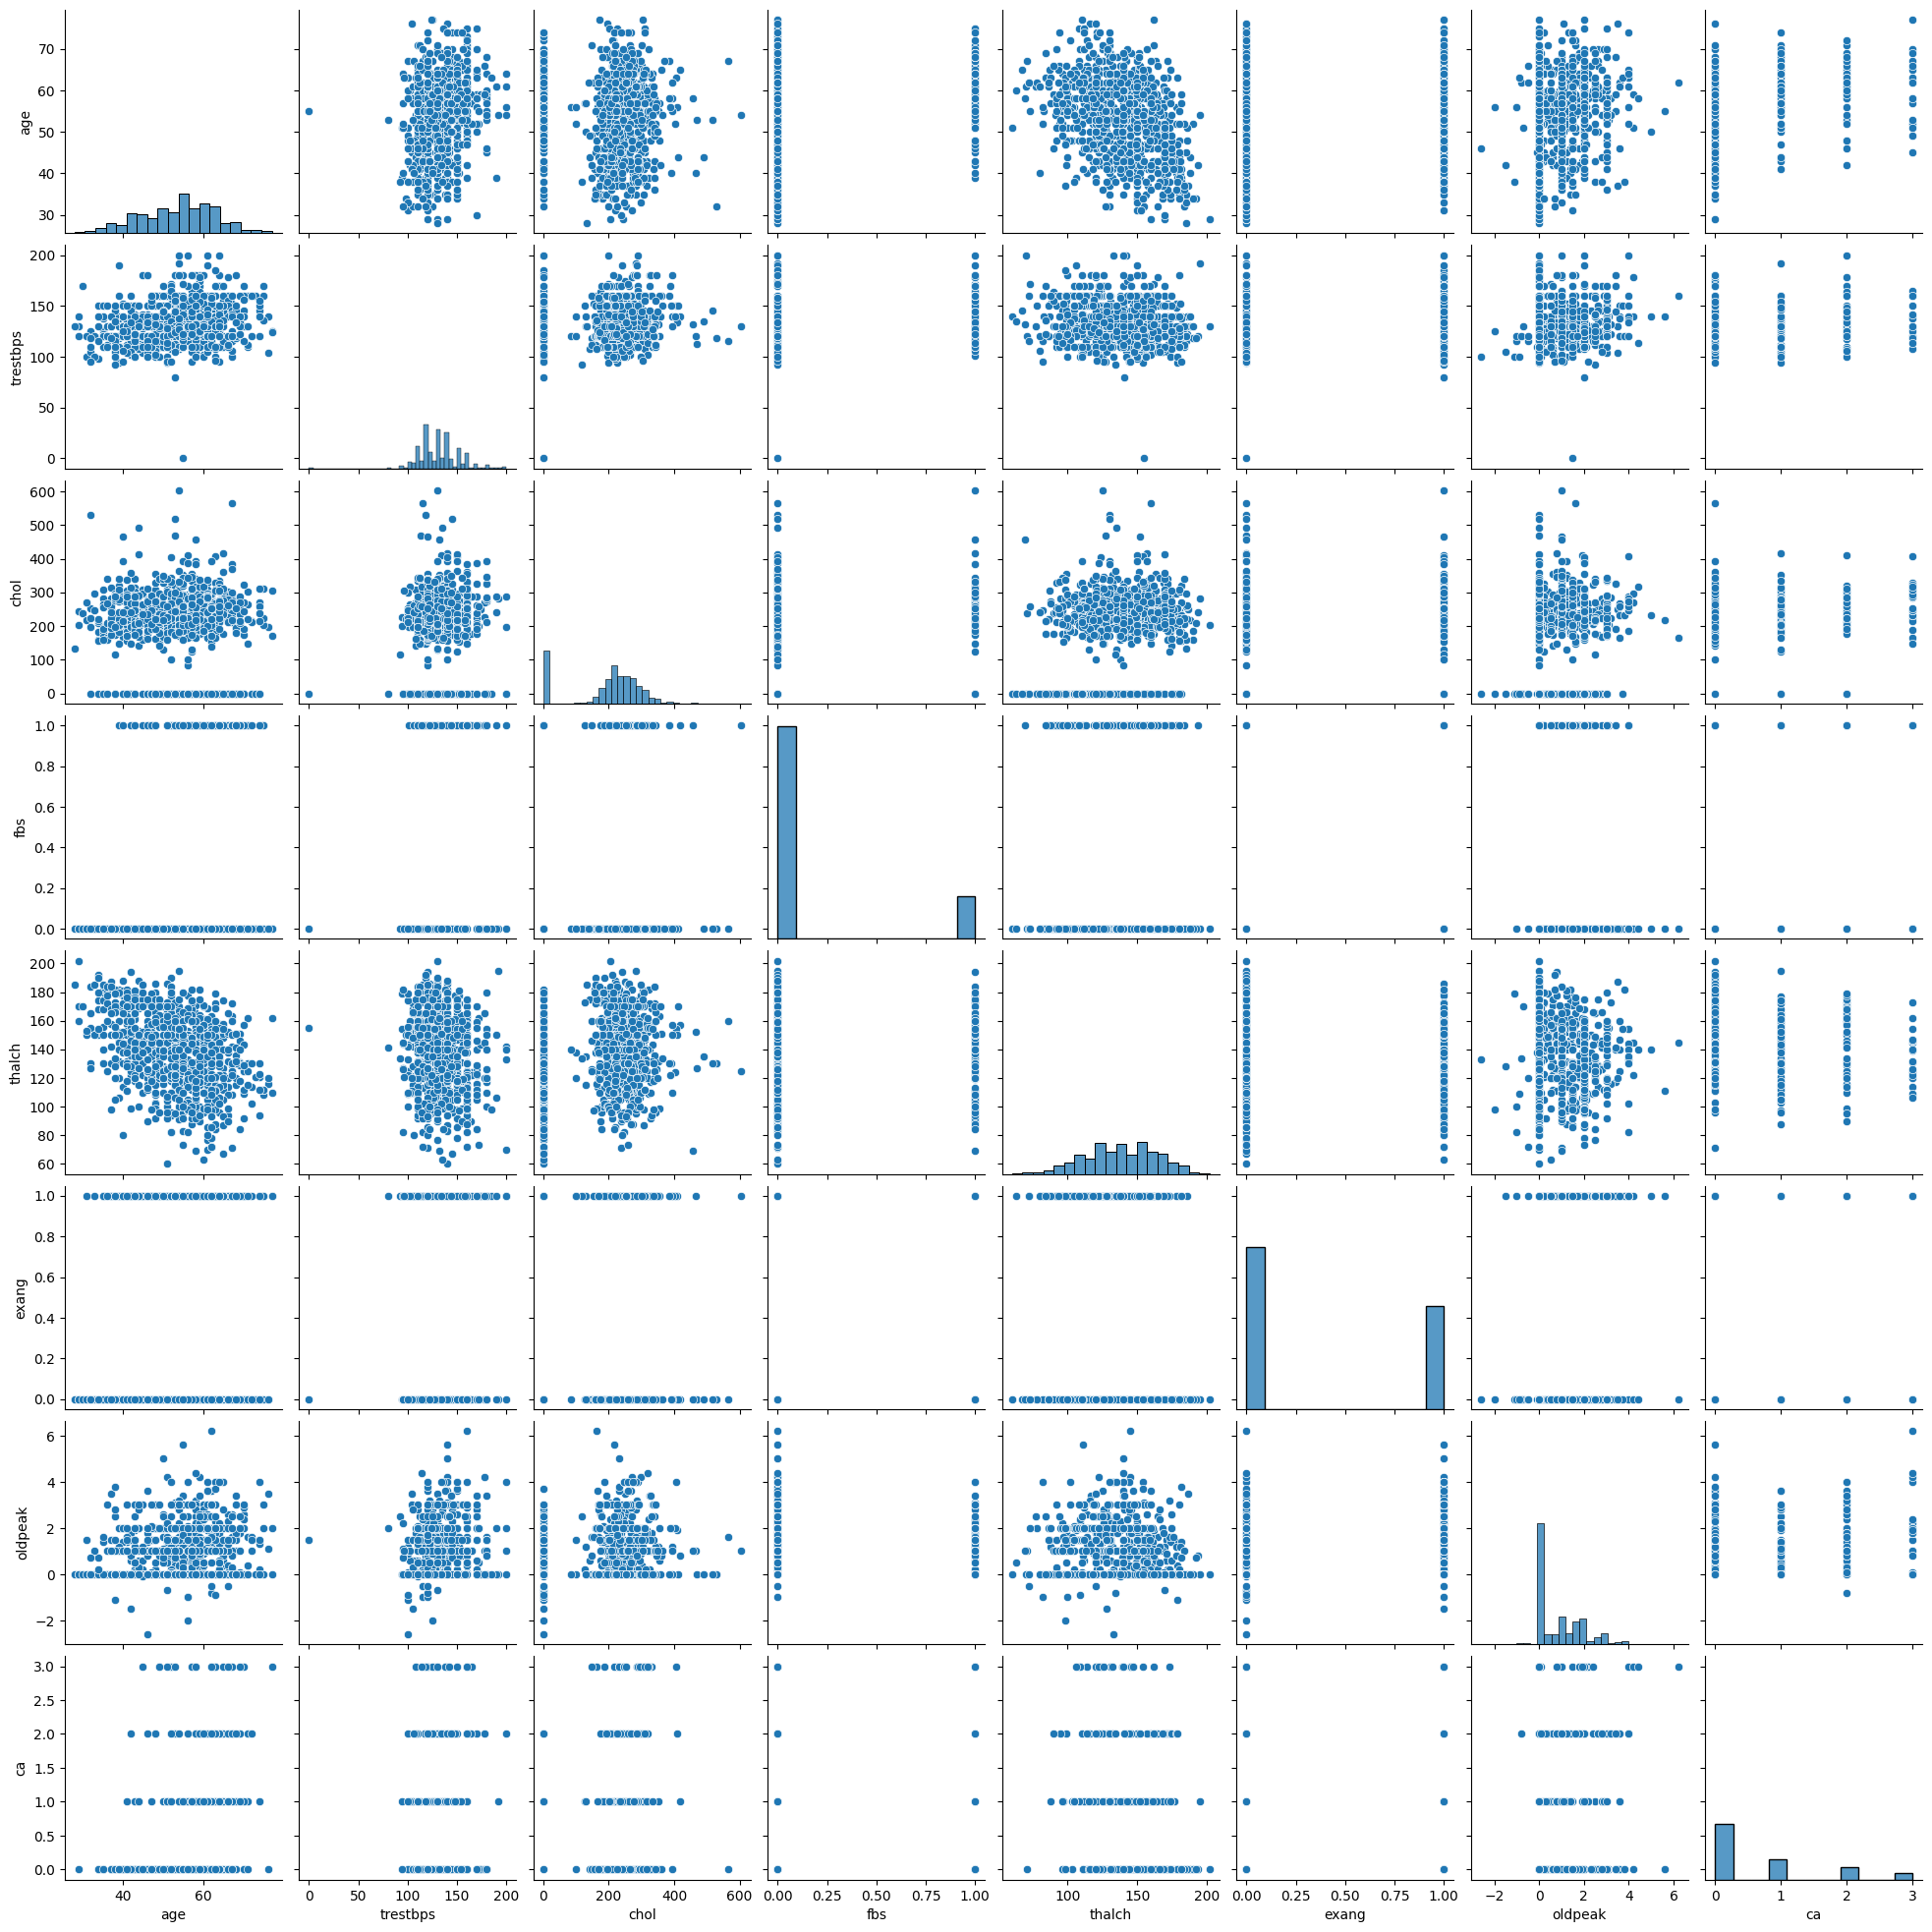

In [120]:
# Pairplots for num-valued (numerical cols & number-labeled categorical columns). ✅

import seaborn as sns
sns.pairplot(df[NUMVAL])
plt.show()
#

#### **SUNDRY VISUALIZATION**

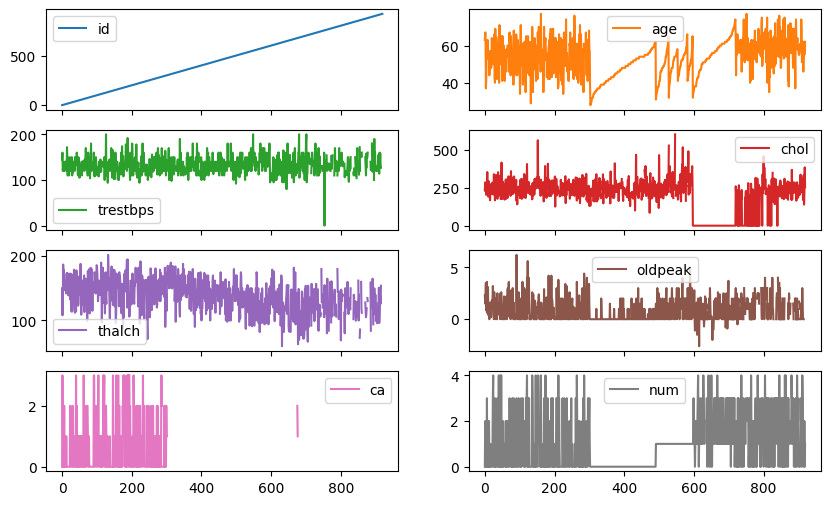

In [121]:
#
# Pairwise Relationships Between Attribs and their Index.

df.plot(kind='line', subplots=True, layout=(4, 2), figsize=(10, 6))
plt.show()
#

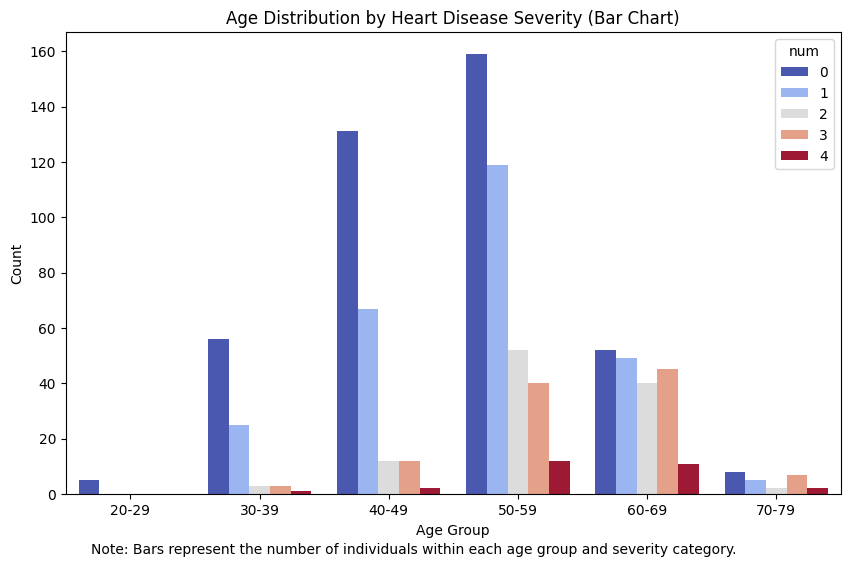

In [122]:
#
# 'Age Distribution by Heart Disease Severity (Bar Chart)'.

plt.figure(figsize=(10, 6))
df['age_group'] = pd.cut(df['age'], bins=range(20, 90, 10), labels=[f'{i}-{i+9}' for i in range(20, 80, 10)])
age_counts = df.groupby(['age_group', 'num'],  observed=True).size().reset_index(name='count')
sns.barplot(data=age_counts, x='age_group', y='count', hue='num', palette='coolwarm')
plt.title('Age Distribution by Heart Disease Severity (Bar Chart)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.figtext(0.15, 0.01, 'Note: Bars represent the number of individuals within each age group and severity category.', ha='left', fontsize=10)
plt.show()

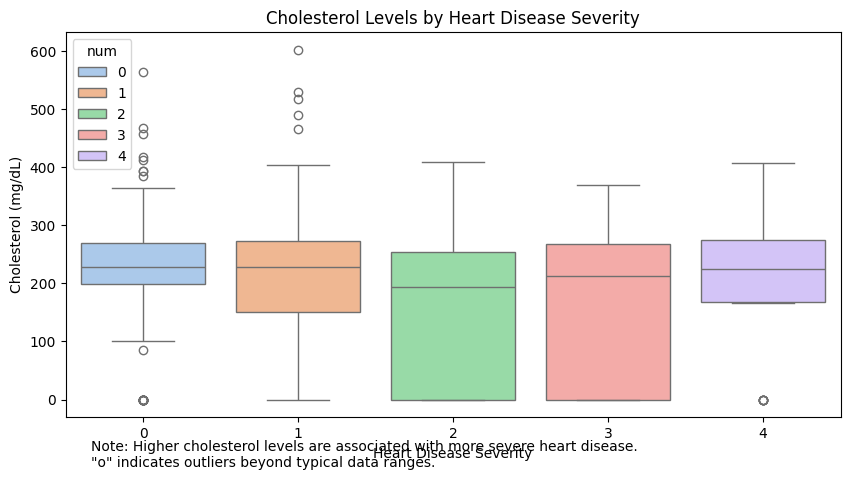

In [123]:
#
# 'Cholesterol Levels by Heart Disease Severity'.

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='num', y='chol', hue='num', palette='pastel')
plt.title('Cholesterol Levels by Heart Disease Severity')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Cholesterol (mg/dL)')
plt.figtext(0.15, 0.01, 'Note: Higher cholesterol levels are associated with more severe heart disease.\n"o" indicates outliers beyond typical data ranges.', ha='left', fontsize=10)
plt.show()

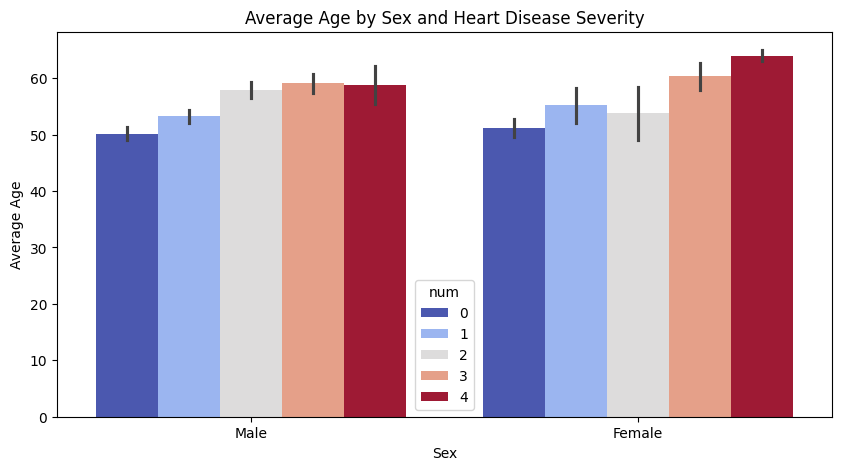

In [124]:
#
# 'Average Age by Sex and Heart Disease Severity'.

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='sex', y='age', hue='num', palette='coolwarm')
plt.title('Average Age by Sex and Heart Disease Severity')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

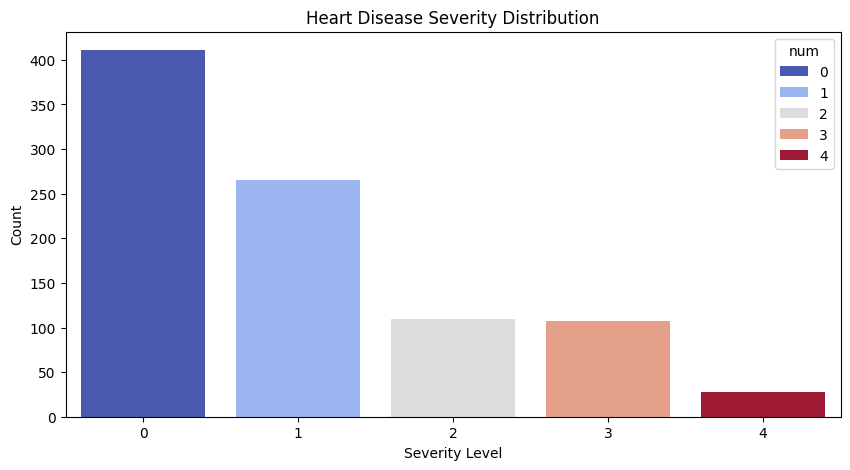

In [125]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='num', hue='num', palette='coolwarm')
plt.title('Heart Disease Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

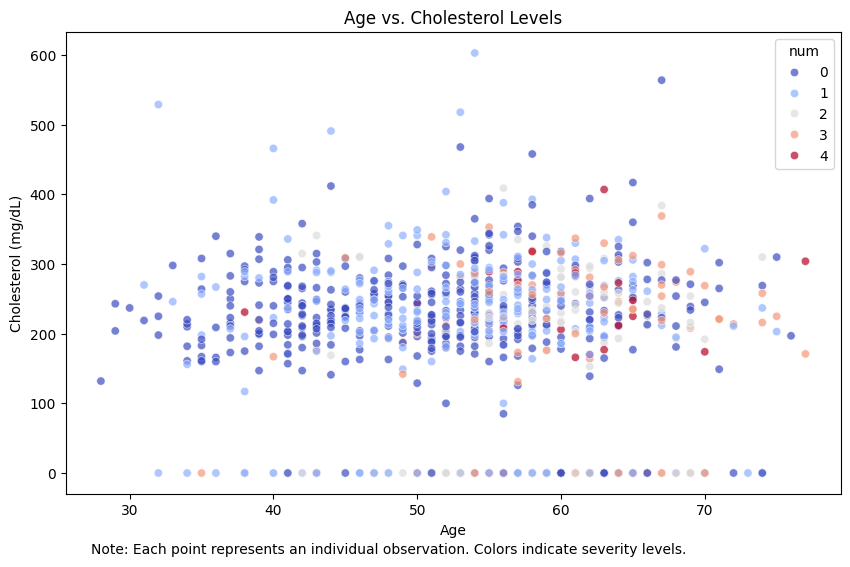

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='chol', hue='num', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dL)')
plt.figtext(0.15, 0.01, 'Note: Each point represents an individual observation. Colors indicate severity levels.', ha='left', fontsize=10)
plt.show()

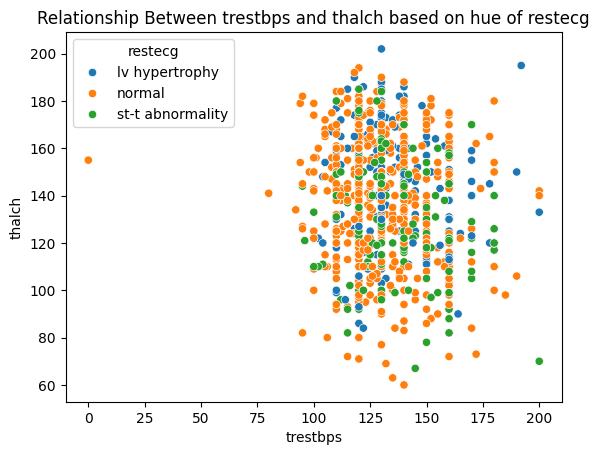

In [127]:

#
# Scatterplot of Relationship Between trestbps and thalch based on hue of restecg.

sns.scatterplot(x='trestbps', y='thalch', hue='restecg', data=df)
# OR:
#sns.scatterplot(x=df['trestbps'], y=df['thalch'], hue=df['restecg'])
plt.title('Relationship Between trestbps and thalch based on hue of restecg')
plt.xlabel('trestbps')
plt.ylabel('thalch')
plt.show()

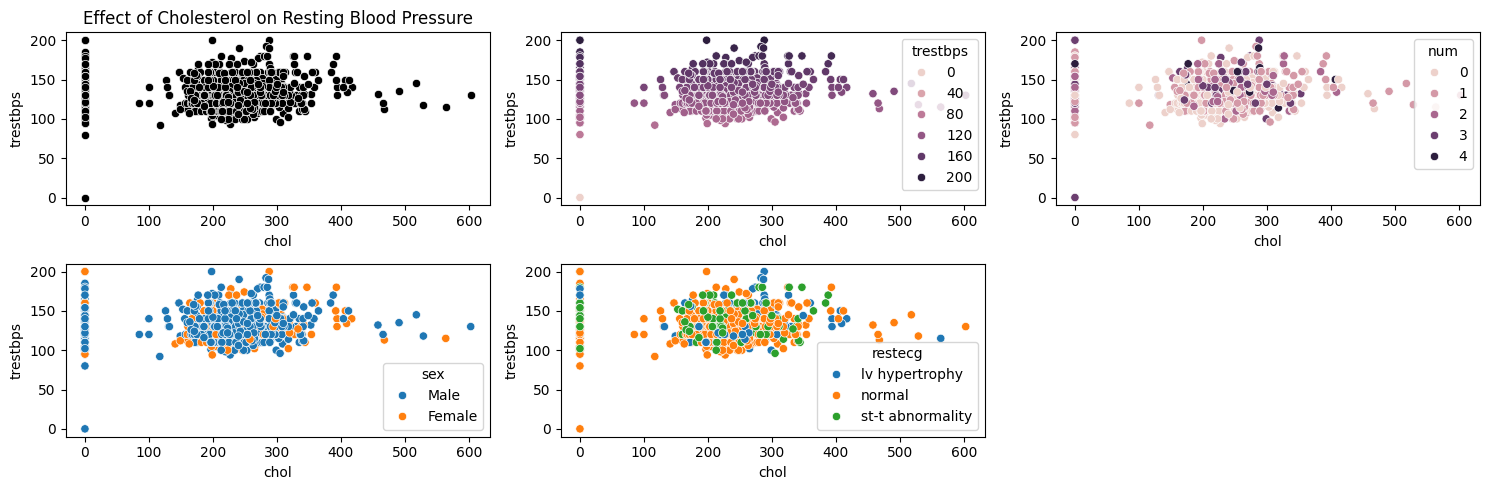

In [128]:
# Effect of Cholesterol on Resting Blood Pressure as seen from different bases.

fig, axes = plt.subplots(2, 3, figsize=(15,5))

axes[0, 0].set_title('Effect of Cholesterol on Resting Blood Pressure')
sns.scatterplot(x='chol', y='trestbps', color='black', data=df, ax=axes[0, 0])
sns.scatterplot(x='chol', y='trestbps', hue='trestbps', data=df, ax=axes[0,1])
sns.scatterplot(x='chol', y='trestbps', hue='num', data=df, ax=axes[0,2])
sns.scatterplot(x='chol', y='trestbps', hue='sex', data=df, ax=axes[1,0])
sns.scatterplot(x='chol', y='trestbps', hue='restecg', data=df, ax=axes[1,1])
axes.flat[5].axis('off')   # Equiv: axes[1,2].axis('off')

plt.tight_layout()
plt.show()

In [129]:

#
# Group DataFrame by Target Variable and Get mean of each Group.

print('Group DataFrame by Target Variable and Get mean of each Group.')
df.groupby('num').mean(numeric_only=True)

Group DataFrame by Target Variable and Get mean of each Group.


,id,age,trestbps,chol,thalch,oldpeak,ca
num,,,,,,,
0,355.257908,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,542.898113,53.528302,132.861111,195.255814,131.035714,1.001200,0.741379
2,554.449541,57.577982,133.613861,143.859813,128.666667,1.353465,1.222222
3,560.467290,59.214953,136.152174,159.716981,120.500000,1.581319,1.459459
4,477.714286,59.214286,138.720000,192.148148,127.846154,2.307692,1.692308


In [130]:

#
# Check verage Cholesterol Levels Based on Target Variable "Num" with Other Features

print('Average Cholesterol Level Based on Target Variable and Chest Pain Type')
print(pd.crosstab(index=df.num, columns=df.cp, values=df.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Patient Gender')
print(pd.crosstab(index=df.num, columns=df.sex, values=df.chol, aggfunc=np.mean))
print('\n')

print('Average Cholesterol Level Based on Target Variable and Cardiographic Results')
print(pd.crosstab(index=df.num, columns=df.restecg, values=df.chol, aggfunc=np.mean))

Average Cholesterol Level Based on Target Variable and Chest Pain Type
cp   asymptomatic  atypical angina  non-anginal  typical angina
num                                                            
0      227.843137       233.957143   222.209677      222.730769
1      193.273684       250.157895   170.756757      215.250000
2      152.321839       123.000000   118.642857       58.500000
3      157.219512       200.000000   152.888889      228.666667
4      196.478261              NaN   146.000000      231.000000


Average Cholesterol Level Based on Target Variable and Patient Gender
sex      Female        Male
num                        
0    248.102190  217.054902
1    221.366667  191.820175
2    216.400000  136.381443
3    216.250000  155.102041
4    316.000000  182.240000


Average Cholesterol Level Based on Target Variable and Cardiographic Results
restecg  lv hypertrophy      normal  st-t abnormality
num                                                  
0            251.768293  2

<ipython-input-130-471264afa617>:5: FutureWarning: The provided callable <function mean at 0x7c8627726ca0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=df.num, columns=df.cp, values=df.chol, aggfunc=np.mean))
<ipython-input-130-471264afa617>:9: FutureWarning: The provided callable <function mean at 0x7c8627726ca0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(pd.crosstab(index=df.num, columns=df.sex, values=df.chol, aggfunc=np.mean))
<ipython-input-130-471264afa617>:13: FutureWarning: The provided callable <function mean at 0x7c8627726ca0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "m

## **G. FEATURE ENGINEERING**

Here we will be treating different aspects of feature engineering, which includes: <br/> <br/>
* Outlier Trimming, <br/>
* Demarcation of Axial sets, <br/>
* Encoding, <br/>
* Recombination of Columns, <br/>
* Normalization. <br/>
* Dimensionality Reduction, <br/>
* Standardization Scaling, <br/>
* Data Balancing, <br/>
* data Splitting, etc.

#### **OUTLIER TRIMMING.**

In [131]:
#df = df.drop(columns="age_group")

In [132]:
df_cleaned.shape, type(df_cleaned)

((920, 14), pandas.core.frame.DataFrame)

In [133]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


In [134]:
df_filtered = df_cleaned.copy(deep=True)

In [135]:
%%script no
import pandas as pd
import numpy as np

# Calculate Q1 and Q3 for each column
Q1 = df_cleaned[NUMCAL_COLS].quantile(0.25)
Q3 = df_cleaned[NUMCAL_COLS].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Filter out outliers
df_filtered = df_cleaned[~((df_cleaned[NUMCAL_COLS] < (Q1 - 1.5 * IQR)) | (df_cleaned[NUMCAL_COLS] > (Q3 + 1.5 * IQR))).any(axis=1)]

Couldn't find program: 'no'


In [136]:
df_filtered.shape

(920, 14)

#### **AXIAL DEMARCATION OF DATASET.**

In [137]:
df_filtered.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [138]:
#
X = df_filtered.drop(columns='num')
y = df_filtered['num']

In [139]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [140]:
X.shape, type(X), y.shape

((920, 13), pandas.core.frame.DataFrame, (920,))

In [141]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: num
Non-Null Count  Dtype
--------------  -----
920 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


In [142]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal


#### **ENCODING.**

In [143]:

# Framelist of Encodable Categorical Attributes.
ENCATCAL_COLS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

# Framelist of Encodable Categorical Features.
ENCATCAL_FTS = ['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

#

In [144]:

# Framelist of Non-encoding Categorical Attributes.
NENCATCAL_COLS = ['fbs', 'exang', 'num']

# Framelist of Non-encoding Categorical Features.
NENCATCAL_FTS = ['fbs', 'exang']

# Framelist of Non-encodable Numval Features.
NEN_NUMVAL_FTS = ['age', 'trestbps', 'chol', 'fbs', 'thalch',  'exang', 'oldpeak']
#

In [145]:
df_filtered[ENCATCAL_FTS].shape, df_filtered[NEN_NUMVAL_FTS].shape

((920, 6), (920, 7))

In [146]:
df_filtered[NEN_NUMVAL_FTS].isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
exang,0
oldpeak,0


In [147]:
df_filtered[ENCATCAL_FTS].isnull().sum()

,0
sex,0
cp,0
restecg,0
slope,0
thal,0
ca,0


In [148]:
print(df_filtered[ENCATCAL_FTS].dtypes)

sex         object
cp          object
restecg     object
slope       object
thal        object
ca         float64
dtype: object


In [149]:
df_filtered['ca'] = df_filtered['ca'].astype(str)

In [150]:
print(df_filtered[ENCATCAL_FTS].dtypes)

sex        object
cp         object
restecg    object
slope      object
thal       object
ca         object
dtype: object


In [151]:
print(X[ENCATCAL_FTS].dtypes)

sex         object
cp          object
restecg     object
slope       object
thal        object
ca         float64
dtype: object


In [152]:
X[ENCATCAL_FTS] = df_filtered[ENCATCAL_FTS]

In [153]:
df_filtered[ENCATCAL_FTS].shape, df_filtered[NEN_NUMVAL_FTS].shape, y.shape, X.shape

((920, 6), (920, 7), (920,), (920, 13))

In [154]:
X.dtypes

,0
age,int64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,bool
restecg,object
thalch,float64
exang,bool
oldpeak,float64


In [155]:
print(df_filtered.isna().sum())  # Check missing values
print(df_filtered.isin([np.inf, -np.inf]).sum())  # Check infinite values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [156]:
print("df_filtered Shape Before Encoding:", df_filtered.shape)

df_filtered Shape Before Encoding: (920, 14)


In [157]:
# Separate categorical and numerical features
# One-Hot Encode categorical features

# Initialize the OneHotEncoder.
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit the encoder on target categorical columns and transform them into one-hot encoded values.
encoded_cats = encoder.fit_transform(df_filtered[ENCATCAL_FTS])

# Get new column names out after encoding.
encoded_cat_names = encoder.get_feature_names_out(ENCATCAL_FTS)
#

In [158]:
print("Encoded Categorical Features Shape:", encoded_cats.shape)
print("Expected Rows (df_filtered.shape[0]):", df_filtered.shape[0])

Encoded Categorical Features Shape: (920, 13)
Expected Rows (df_filtered.shape[0]): 920


In [159]:
print("Numerical Features Shape:", df_filtered[NEN_NUMVAL_FTS].shape)

Numerical Features Shape: (920, 7)


In [160]:
ENCATCAL_FTS

['sex', 'cp', 'restecg', 'slope', 'thal', 'ca']

In [161]:
encoded_cat_names.shape, encoded_cat_names

((13,),
 array(['sex_Male', 'cp_atypical angina', 'cp_non-anginal',
        'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality',
        'slope_flat', 'slope_upsloping', 'thal_normal',
        'thal_reversable defect', 'ca_1.0', 'ca_2.0', 'ca_3.0'],
       dtype=object))

In [162]:
encoded_cats.shape, df_filtered.shape, y.shape

((920, 13), (920, 14), (920,))

####  **MERGING OF NUMBER-CODED FEATURES.**

HERE WE CONCATENATE THE NUMERCAL FEATURES AND ENCODED CATEGORICAL FEATURES TO FORM A SUPER SET CALLED NUMCODED FEATURES.

In [163]:
# Reset index before merging to prevent misalignment
df_filtered = df_filtered.reset_index(drop=True)

#df_encoded = pd.DataFrame(encoded_cats, columns=encoded_cat_names)
df_encoded = pd.DataFrame(encoded_cats, columns=encoded_cat_names, index=df_filtered.index)
df_encoded = df_encoded.reset_index(drop=True)

# Merge encoded categorical and numerical features
X_coded = pd.concat([df_filtered[NEN_NUMVAL_FTS], df_encoded], axis=1)

# Ensure row count is correct
assert X_coded.shape[0] == df_filtered.shape[0], "Row mismatch detected!"

print("Final X_coded Shape:", X_coded.shape)

Final X_coded Shape: (920, 20)


In [164]:
X_coded.shape, y.shape

((920, 20), (920,))

In [165]:
X_coded.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,63,145.0,233.0,True,150.0,False,2.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67,160.0,286.0,False,108.0,True,1.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,67,120.0,229.0,False,129.0,True,2.6,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,37,130.0,250.0,False,187.0,False,3.5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,41,130.0,204.0,False,172.0,False,1.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [166]:
X_coded.isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
exang,0
oldpeak,0
sex_Male,0
cp_atypical angina,0
cp_non-anginal,0


In [167]:
X_coded = X_coded.dropna()

In [168]:
X_coded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   trestbps                  920 non-null    float64
 2   chol                      920 non-null    float64
 3   fbs                       920 non-null    bool   
 4   thalch                    920 non-null    float64
 5   exang                     920 non-null    bool   
 6   oldpeak                   920 non-null    float64
 7   sex_Male                  920 non-null    float64
 8   cp_atypical angina        920 non-null    float64
 9   cp_non-anginal            920 non-null    float64
 10  cp_typical angina         920 non-null    float64
 11  restecg_normal            920 non-null    float64
 12  restecg_st-t abnormality  920 non-null    float64
 13  slope_flat                920 non-null    float64
 14  slope_upsl

In [169]:
X_coded.isnull().sum()

,0
age,0
trestbps,0
chol,0
fbs,0
thalch,0
exang,0
oldpeak,0
sex_Male,0
cp_atypical angina,0
cp_non-anginal,0


In [170]:
X_coded.shape

(920, 20)

#### **NORMALIIZATION SCALING OF DATA (Z-SCORE STANDARD SCALER).**

In [171]:


# Standardized Scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_coded)
#

In [172]:
#
X_scaled.shape, type(X_scaled)

((920, 20), numpy.ndarray)

In [173]:
X_scaled

array([[ 1.00738556,  0.70517639,  0.30364317, ..., -0.28026114,
        -0.21597202, -0.1490712 ],
       [ 1.43203377,  1.51856943,  0.78996695, ..., -0.28026114,
        -0.21597202,  6.70820393],
       [ 1.43203377, -0.65047866,  0.26693949, ..., -0.28026114,
         4.63022941, -0.1490712 ],
       ...,
       [ 0.15808914, -0.54202626,  0.21188397, ..., -0.28026114,
        -0.21597202, -0.1490712 ],
       [ 0.4765753 , -0.10821664,  1.69838307, ..., -0.28026114,
        -0.21597202, -0.1490712 ],
       [ 0.90122351, -0.65047866,  0.4963375 , ..., -0.28026114,
        -0.21597202, -0.1490712 ]])

In [174]:
X_scaled2 = pd.DataFrame(X_scaled)
X_scaled2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.007386,0.705176,0.303643,2.380476,0.489727,-0.760292,1.368109,0.516931,-0.482953,-0.533775,4.358899,-1.227523,-0.491493,-1.568007,-0.532094,-1.692792,-0.513553,-0.280261,-0.215972,-0.149071
1,1.432034,1.518569,0.789967,-0.420084,-1.181478,1.315283,0.611589,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,-0.491493,0.637752,-0.532094,0.590740,-0.513553,-0.280261,-0.215972,6.708204
2,1.432034,-0.650479,0.266939,-0.420084,-0.345875,1.315283,1.651804,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,-0.491493,0.637752,-0.532094,-1.692792,1.947220,-0.280261,4.630229,-0.149071
3,-1.752828,-0.108217,0.459634,-0.420084,1.961979,-0.760292,2.502889,0.516931,-0.482953,1.873447,-0.229416,0.814649,-0.491493,-1.568007,-0.532094,0.590740,-0.513553,-0.280261,-0.215972,-0.149071
4,-1.328180,-0.108217,0.037541,-0.420084,1.365120,-0.760292,0.517024,-1.934494,2.070593,-0.533775,-0.229416,-1.227523,-0.491493,-1.568007,1.879367,0.590740,-0.513553,-0.280261,-0.215972,-0.149071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,-0.270895,1.221235,2.380476,0.648889,-0.760292,-0.806886,-1.934494,-0.482953,-0.533775,-0.229416,-1.227523,2.034617,0.637752,-0.532094,0.590740,-0.513553,-0.280261,-0.215972,-0.149071
916,0.901224,-0.108217,-0.558893,-0.420084,0.091821,-0.760292,-0.334061,0.516931,-0.482953,-0.533775,4.358899,-1.227523,2.034617,0.637752,-0.532094,0.590740,-0.513553,-0.280261,-0.215972,-0.149071
917,0.158089,-0.542026,0.211884,2.380476,-1.499803,-0.760292,-0.806886,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,2.034617,0.637752,-0.532094,-1.692792,-0.513553,-0.280261,-0.215972,-0.149071
918,0.476575,-0.108217,1.698383,2.380476,0.091821,-0.760292,-0.334061,0.516931,-0.482953,-0.533775,-0.229416,-1.227523,-0.491493,0.637752,-0.532094,0.590740,-0.513553,-0.280261,-0.215972,-0.149071


In [175]:
X_scaled.shape

(920, 20)

#### **DIMENSIONALITY REDUCTION**

In [176]:
#X_scaled.isnull().sum()

In [177]:
# Apply PCA (Keep 10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
#

In [178]:
#
X_pca.shape, type(X_pca)

((920, 10), numpy.ndarray)

In [179]:
#
# Convert PCA results into DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
X_pca_df
#

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.495288,1.218960,-1.954033,1.698926,0.205584,-0.729373,3.190829,-0.857648,-0.465388,-2.806201
1,-2.548819,-0.684666,-0.729265,1.718426,0.928203,1.920356,-1.600232,4.276354,-1.722481,-2.127867
2,-3.708802,1.350060,0.692933,1.605105,0.590981,-0.943520,1.276093,-0.235285,-0.787912,3.167718
3,1.456758,1.014338,0.266424,-0.311925,0.945776,1.591849,0.278690,0.240085,-1.983673,-0.223510
4,2.750527,1.849241,-1.108466,0.888553,0.340654,-1.334670,-1.368322,0.502048,-0.475908,0.614375
...,...,...,...,...,...,...,...,...,...,...
915,0.644033,-1.313554,-2.445600,1.793842,-1.381610,0.391655,-0.098801,-0.262059,0.318974,0.446666
916,-0.283407,-1.350273,-2.309148,0.119224,-0.653663,-1.486575,2.666499,-1.378837,-1.751931,-1.499785
917,-1.485043,-1.417829,-1.520214,0.111750,-2.179046,-0.530148,0.374468,0.152029,0.907170,-0.264904
918,0.002379,-0.939106,-1.163410,1.539786,-0.462370,0.731015,0.428865,-0.090389,0.859837,-1.020072


In [180]:

#df_cleaned['sex'] = df_cleaned['sex'].map({'Male': 1, 'Female': 0})  # Numeric encoding

In [181]:
# Get the feature importance
feature_importance = np.abs(pca.components_)

# Get the average feature importance across all components
avg_importance = np.mean(feature_importance, axis=0)

# Get the indices of the least important features
least_important_features = np.argsort(avg_importance)

# Print the least important features
print("Least important features:", least_important_features)

len_of_least_features = len(least_important_features )
print("len_of_least_features: ", len_of_least_features)

Least important features: [ 0  1  4  6  7  5 16 15 14  2  9 13 11 18  3 12  8 17 19 10]
len_of_least_features:  20


#### **HANDLING IMBALANCE (OVERSAMPLING).**

In [182]:
X_pca.shape

(920, 10)

In [183]:
y.shape

(920,)

In [184]:
# 5. Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

In [185]:


X_resampled.shape, type(X_resampled)

((2055, 10), numpy.ndarray)

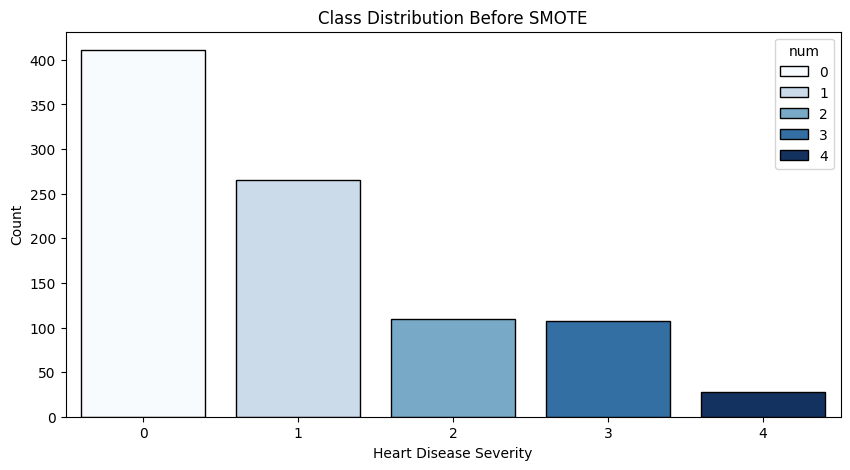

In [186]:
# Visualize Class Distribution Before SMOTE resampling.
plt.figure(figsize=(10, 5))
sns.countplot(x=y, hue=y, palette='Blues', edgecolor='black' )
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.show()

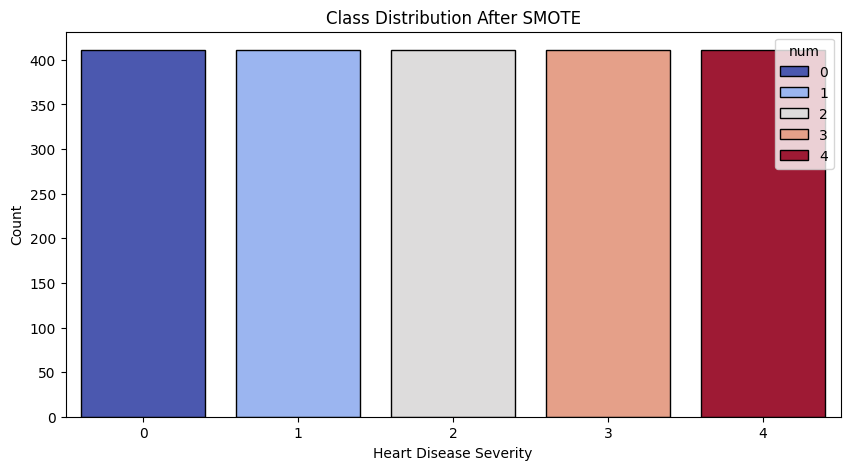

In [187]:
# Visualize Class Distribution After SMOTE resampling.
plt.figure(figsize=(10, 5))
sns.countplot(x=y_resampled, hue=y_resampled, palette='coolwarm', edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Heart Disease Severity')
plt.ylabel('Count')
plt.show()

#### **DATA SPLITTING.**

In [188]:
# 6. Train-Test Split
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [189]:
# Train-temp split of X axial dataset.

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) #temp values

In [190]:
X_train.shape, X_temp.shape

((1438, 10), (617, 10))

In [191]:
#
# Val-Test Split of Temp sub-dataset.

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #validat values

In [192]:
#
X_train.shape, X_val.shape, X_test.shape

((1438, 10), (308, 10), (309, 10))

In [193]:
#X_train.info()
X_train

array([[-0.34051835, -1.8769011 ,  0.9909763 , ...,  0.4557454 ,
         1.23369112, -0.07584578],
       [ 3.10997265, -0.64562935,  1.69229055, ...,  0.16608555,
        -0.66791177, -0.39980784],
       [ 1.8703437 ,  1.52663565,  0.03299043, ...,  0.46096362,
        -0.02785509, -0.51432035],
       ...,
       [-1.26866298, -1.66367486, -1.71635047, ..., -0.30589446,
        -0.71005794,  0.3031565 ],
       [-0.28125927, -1.47390972, -2.37487734, ...,  0.20120217,
         0.31861811,  0.37705172],
       [-3.64753544,  1.29579399,  0.14720147, ...,  0.49484159,
         2.28323434, -1.0195664 ]])

In [194]:
print("Shape:", X_train.shape)
print("Size:", X_train.size)
print("Data type:", X_train.dtype)

Shape: (1438, 10)
Size: 14380
Data type: float64


## **H. MODELING.**

#### **DEFAULT INITIALIZATION OF MODELS**

In [195]:
from sklearn.metrics import f1_score, roc_auc_score

In [196]:

# DEFAULT INITIALIZATION OF MODELS.

models1 = {
    'Linear Classif': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [197]:

models_list1 = {}

In [198]:
# DEFAULT-MODE METRICATION.

print("## DEFAULT-MODE METRICATION VALUES.")
print('****************\n')

for name1, model1 in models1.items():
    model1.fit(X_train, y_train)
    y_pred_val1 = model1.predict(X_val)
    accuracy1 = accuracy_score(y_val, y_pred_val1)
    #f1score1 = f1_score(y_val, y_pred_val1)
    models_list1[name1] = {'model': model1, 'accuracy': accuracy1}
    print(f"{name1} Accuracy: {accuracy1:.8f}")
    print("F1 score (macro):", f1_score(y_val, y_pred_val1, average='macro'))
    print("F1 score (micro):", f1_score(y_val, y_pred_val1, average='micro'))
    print("F1 score (weighted):", f1_score(y_val, y_pred_val1, average='weighted'))
    print('****************\n')

#

## DEFAULT-MODE METRICATION VALUES.
****************

Linear Classif Accuracy: 0.50649351
F1 score (macro): 0.5001574905494839
F1 score (micro): 0.5064935064935064
F1 score (weighted): 0.49801713474146136
****************

Gradient Boosting Accuracy: 0.66233766
F1 score (macro): 0.6576321459278367
F1 score (micro): 0.6623376623376623
F1 score (weighted): 0.6562803223699791
****************



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Accuracy: 0.70129870
F1 score (macro): 0.7001491226876079
F1 score (micro): 0.7012987012987013
F1 score (weighted): 0.6979586356066184
****************

Random Forest Accuracy: 0.82142857
F1 score (macro): 0.8177920690290443
F1 score (micro): 0.8214285714285714
F1 score (weighted): 0.8164291036978721
****************



In [199]:
#
print(models_list1)

{'Linear Classif': {'model': LogisticRegression(random_state=42), 'accuracy': 0.5064935064935064}, 'Gradient Boosting': {'model': GradientBoostingClassifier(random_state=42), 'accuracy': 0.6623376623376623}, 'Neural Network': {'model': MLPClassifier(random_state=42), 'accuracy': 0.7012987012987013}, 'Random Forest': {'model': RandomForestClassifier(random_state=42), 'accuracy': 0.8214285714285714}}


In [200]:
#
best_model_name = max(models_list1, key=lambda x: models_list1[x]['accuracy'])
best_model1 = models_list1[best_model_name]['model']
print(f"Best Model From Default Initialization is:   {best_model_name}, Accuracy: {models_list1[best_model_name]['accuracy']:.2f}")

Best Model From Default Initialization is:   Random Forest, Accuracy: 0.82


#### **CUSTOMIZATION OF MODELS**

In [201]:
# DEFINE CUSTOM HYPERPARAMETER DICTIONARIES.
params = {
    'Linear Classif':{
    },
    'Random Forest': {

    },
    'Gradient Boosting': {
        'n_estimators': 200,
        'learning_rate': 0.05,
        'max_depth': 5,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'random_state': 42
    },
    'Neural Network': {
    'max_iter': 2000,
    }
}

In [202]:
# DEFINE CUSTOM INITIALIZED MODELS.
models = {
    'Linear Classif': LogisticRegression(**params['Linear Classif']),
    'Random Forest': RandomForestClassifier(**params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(**params['Gradient Boosting']),
    'Neural Network': MLPClassifier(**params['Neural Network'])
}

In [203]:
best_models_forms = {}

In [204]:
# CUSTOM-MODE METRICATION VALUES.

print("CUSTOM-MODE VALIDATION METRICS.")
print('****************\n')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    best_models_forms[name] = {'model': model, 'accuracy': accuracy}
    print(f"{name} Accuracy: {accuracy:.8f}")
    print("F1 score (macro):", f1_score(y_val, y_pred_val, average='macro'))
    print("F1 score (micro):", f1_score(y_val, y_pred_val, average='micro'))
    print("F1 score (weighted):", f1_score(y_val, y_pred_val, average='weighted'))
    print('****************\n')

CUSTOM-MODE VALIDATION METRICS.
****************

Linear Classif Accuracy: 0.50649351
F1 score (macro): 0.5001574905494839
F1 score (micro): 0.5064935064935064
F1 score (weighted): 0.49801713474146136
****************

Random Forest Accuracy: 0.79870130
F1 score (macro): 0.7938989750577112
F1 score (micro): 0.7987012987012987
F1 score (weighted): 0.7923688149063698
****************

Gradient Boosting Accuracy: 0.71103896
F1 score (macro): 0.7082844428298973
F1 score (micro): 0.711038961038961
F1 score (weighted): 0.7065936555901137
****************

Neural Network Accuracy: 0.74350649
F1 score (macro): 0.742013570511645
F1 score (micro): 0.7435064935064936
F1 score (weighted): 0.7398322381817705
****************



In [205]:
print(best_models_forms)

{'Linear Classif': {'model': LogisticRegression(), 'accuracy': 0.5064935064935064}, 'Random Forest': {'model': RandomForestClassifier(), 'accuracy': 0.7987012987012987}, 'Gradient Boosting': {'model': GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200,
                           random_state=42), 'accuracy': 0.711038961038961}, 'Neural Network': {'model': MLPClassifier(max_iter=2000), 'accuracy': 0.7435064935064936}}


#### **ESTIMATING BEST-PERFORMING MODEL FROM VALIDATION**

In [206]:
best_model_name = max(best_models_forms, key=lambda x: best_models_forms[x]['accuracy'])
best_model = best_models_forms[best_model_name]['model']
print(f"Best Model From Validation: {best_model_name} (Accuracy: {best_models_forms[best_model_name]['accuracy']:.2f})")

Best Model From Validation: Random Forest (Accuracy: 0.80)



#### **FINAL EVALUATION**

In [207]:

print("## FINAL EVALUATION PHASE METRICATION.")
print('************************************')

best_accuracy = 0
best_model_name = ""
best_model = None

for name2, model2 in models.items():
    y_pred_test = model2.predict(X_test)
    #print(f"{name2} - Best Parameters: \n{models.best_params_}")
    print(f"👍 {name2} - Best Parameters: \n{model2.get_params}")
    print("\nconfusion_matrix :\n", confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"{name2} Accuracy: {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name2
        best_model = model2

    print('\n********************************************')

## FINAL EVALUATION PHASE METRICATION.
************************************
👍 Linear Classif - Best Parameters: 
<bound method BaseEstimator.get_params of LogisticRegression()>

confusion_matrix :
 [[58  2  2  2  3]
 [13 27  9  9  5]
 [ 4  7 17 14 12]
 [ 2 20 10 20 16]
 [ 6  0 14  5 32]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.77        67
           1       0.48      0.43      0.45        63
           2       0.33      0.31      0.32        54
           3       0.40      0.29      0.34        68
           4       0.47      0.56      0.51        57

    accuracy                           0.50       309
   macro avg       0.48      0.49      0.48       309
weighted avg       0.48      0.50      0.49       309

Linear Classif Accuracy: 0.50

********************************************
👍 Random Forest - Best Parameters: 
<bound method BaseEstimator.get_params of RandomForestClassifier()>

confusion_matrix :
 [[59  4  4  0  0]
 [1

#### **CHOOSING BEST-PERFORMING MODEL FROM FINAL EVALUATION**

In [208]:
print(f"\n👍👍👍Best Model From Final Evaluation: {best_model_name} (Accuracy: {best_accuracy:.2f})")


👍👍👍Best Model From Final Evaluation: Random Forest (Accuracy: 0.85)


#### **EXPORT BEST MODEL.**

In [209]:
# Export the best model
import joblib
joblib.dump(best_model, f"{best_model_name}.joblib")
print(f"Best model saved to {best_model_name}.joblib")
#

Best model saved to Random Forest.joblib


## **I. INTERFACE DEVELOPMENT**

#### PCA LOADING.

In [210]:
#
# PCA Loadings Table
loadings = pd.DataFrame(pca.components_, columns=X_coded.columns, index=[f'PC{i+1}' for i in range(10)])    #
print("\nPCA Component Loadings (Feature Contributions):")
print(loadings)


PCA Component Loadings (Feature Contributions):
           age  trestbps      chol       fbs    thalch     exang   oldpeak  \
PC1  -0.316762 -0.187612  0.103165 -0.128897  0.328283 -0.351129 -0.313825   
PC2   0.033252 -0.044263  0.049938 -0.026301  0.266103 -0.049443  0.057348   
PC3  -0.272271 -0.146075 -0.020618 -0.249208 -0.052764  0.093187 -0.042227   
PC4   0.007509  0.283762  0.564254  0.227701  0.228773 -0.083515  0.113858   
PC5   0.151223  0.171006  0.091211 -0.125271 -0.164728  0.352041  0.405162   
PC6   0.118609  0.079816  0.261413  0.114805  0.012635 -0.041966  0.054991   
PC7   0.064361  0.000550 -0.217868  0.209927  0.072608 -0.299616 -0.097062   
PC8   0.014227  0.080399 -0.147657  0.083250 -0.030320 -0.114205  0.018544   
PC9   0.370262  0.324449 -0.114217  0.447689 -0.226539 -0.113951 -0.361401   
PC10  0.022681 -0.086705 -0.107206 -0.276290 -0.029594  0.028499 -0.017877   

      sex_Male  cp_atypical angina  cp_non-anginal  cp_typical angina  \
PC1  -0.199027     

In [211]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'age_group'],
      dtype='object')

#### MAIN DEPLOYMENT CODE

In [212]:
#
import gradio as gr
import joblib
import numpy as np

# Load trained model
model = joblib.load("Random Forest.joblib")

# PCA Loadings.
pca_loadings = np.array([
    [-0.316762, -0.187612,  0.103165, -0.128897,  0.328283, -0.351129, -0.313825, -0.199027,  0.289353,  0.094553,  0.003036,  0.175429, -0.116113],
    [ 0.033252, -0.044263,  0.049938, -0.026301,  0.266103, -0.049443,  0.057348, -0.063358, -0.048510,  0.075796,  0.050982,  0.010781, -0.245492],
    [-0.272271, -0.146075, -0.020618, -0.249208, -0.052764,  0.093187, -0.042227,  0.067991,  0.077763, -0.089664, -0.113173,  0.534433, -0.496933],
    [ 0.007509,  0.283762,  0.564254,  0.227701,  0.228773, -0.083515,  0.113858, -0.298945,  0.294071, -0.238744,  0.157231, -0.093791, -0.092558],
    [ 0.151223,  0.171006,  0.091211, -0.125271, -0.164728,  0.352041,  0.405162, -0.078128, -0.099113, -0.193458,  0.063514,  0.310465, -0.273889],
    [ 0.118609,  0.079816,  0.261413,  0.114805,  0.012635, -0.041966,  0.054991, -0.163650, -0.391915,  0.692971, -0.179340,  0.098765, -0.211190],
    [ 0.064361,  0.000550, -0.217868,  0.209927,  0.072608, -0.299616, -0.097062,  0.131547, -0.302248,  0.145179,  0.582892,  0.145106, -0.145703],
    [ 0.014227,  0.080399, -0.147657,  0.083250, -0.030320, -0.114205,  0.018544,  0.071489,  0.121452,  0.001471, -0.299141,  0.073951, -0.008747],
    [ 0.370262,  0.324449, -0.114217,  0.447689, -0.226539, -0.113951, -0.361401,  0.004834,  0.263676, -0.014000, -0.295284,  0.237323, -0.165543],
    [ 0.022681, -0.086705, -0.107206, -0.276290, -0.029594,  0.028499, -0.017877, -0.440172, -0.018429,  0.190285, -0.402152, -0.123353,  0.134631]
])

# Feature names
features = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak',
            'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
            'restecg_normal', 'restecg_st-t abnormality']

# Sample mean and std values gotten from trained data.
means = np.array([53.51, 132.13, 199.13, 0.67, 137.54, 0.87, 0.87, 0.78, 0.19, 0.21, 0.06, 0.6, 0.2])
stds = np.array([9.42, 19.07, 110.78, 0.93, 25.92, 1.09, 1.09, 0.41, 0.39, 0.4, 0.24, 0.49, 0.4])

In [213]:
#
# Risk Levels Mapping
RISK_LEVELS = {
    0: "Level 0: Zero risk!",
    1: "Level 1: Low risk!",
    2: "Level 2: Midi risk!",
    3: "Level 3: High risk!",
    4: "Level 4: Extreme risk!"
}

def preprocess_and_predict(age, trestbps, chol, fbs, thalch, exang, oldpeak, sex, cp, restecg):
    # Encode categorical features
    sex_encoded = 1 if sex == "Male" else 0
    cp_encoding = [0, 0, 0]  # Default "typical angina"
    if cp == "atypical angina":
        cp_encoding = [1, 0, 0]
    elif cp == "non-anginal":
        cp_encoding = [0, 1, 0]
    elif cp == "asymptomatic":
        cp_encoding = [0, 0, 1]

    restecg_encoding = [0, 0]  # Default "lv hypertrophy"
    if restecg == "normal":
        restecg_encoding = [1, 0]
    elif restecg == "st-t abnormality":
        restecg_encoding = [0, 1]

    # Convert to NumPy array
    x = np.array([age, trestbps, chol, int(fbs == "True"), thalch,
                  int(exang == "Yes"), oldpeak, sex_encoded] + cp_encoding + restecg_encoding)

    # Standardize
    x_scaled = (x - means) / stds

    # Apply PCA manually
    x_pca = np.dot(pca_loadings, x_scaled)

    # Predict
    prediction = model.predict([x_pca])[0]
    risk_text = RISK_LEVELS.get(prediction, "Unknown")

    # Heart Disease Image (Static)
    #heart_image = "heart_disease.jpg"  # Update with actual path
    heart_image = "/content/gettyimages-1367997548-612x612.jpg"  # actual image path

    return risk_text, heart_image

# Define Gradio Interface
iface = gr.Interface(
    fn=preprocess_and_predict,
    inputs=[
        gr.Slider(18, 120, label="Age"),
        gr.Slider(0, 250, label="Resting Blood Pressure (trestbps)"),
        gr.Slider(0, 1000, label="Cholesterol (chol)"),
        gr.Radio(["True", "False"], label="Fasting Blood Sugar (fbs)",
                 info="True if > 120, else False."),
        gr.Slider(20, 300, label="Max Heart Rate (thalch)"),
        gr.Radio(["Yes", "No"], label="Exercise Induced Angina (exang)",
                 info="Pain due to restricted blood flow."),
        gr.Slider(-5.0, 10.0, label="ST Depression (oldpeak)"),
        gr.Dropdown(["Male", "Female"], label="Sex"),
        gr.Radio(["typical angina", "atypical angina", "non-anginal", "asymptomatic"],
                 label="Chest Pain Type (cp)"),
        gr.Dropdown(["lv hypertrophy", "normal", "st-t abnormality"],
                    label="Resting ECG (restecg)")
    ],
    outputs=["text", "image"],  # Text for Risk Level, Image for Heart Disease
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0dc0f929b003405121.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
